## Scene_Text_Detection을 활용한 채팅 속도 변화에 따른 스트리밍 방송 하이라이트 기점 자동 추출
### - Dataset
- Youtube, 세아스토리 채널, Smile Gate Corp.
    - Category: Just Chatting
    - 5 Video Pairs: (Abbreviation : original-frame-time : highlight)
    
        1.Dentist 
        : [220419] 치과 치료비! 폰흥선 삥 뜯으러 출근했습니다 - 클러스터 트럭 [풀영상], https://youtu.be/Hvy1XgTDIEc -12335-3시간25분33초
        : 좋게 말할 때 금니 값은 내놓으시지, https://youtu.be/redDV3KIjk8, 6분 18초 (*방송 on : 22분 41초 ~)

        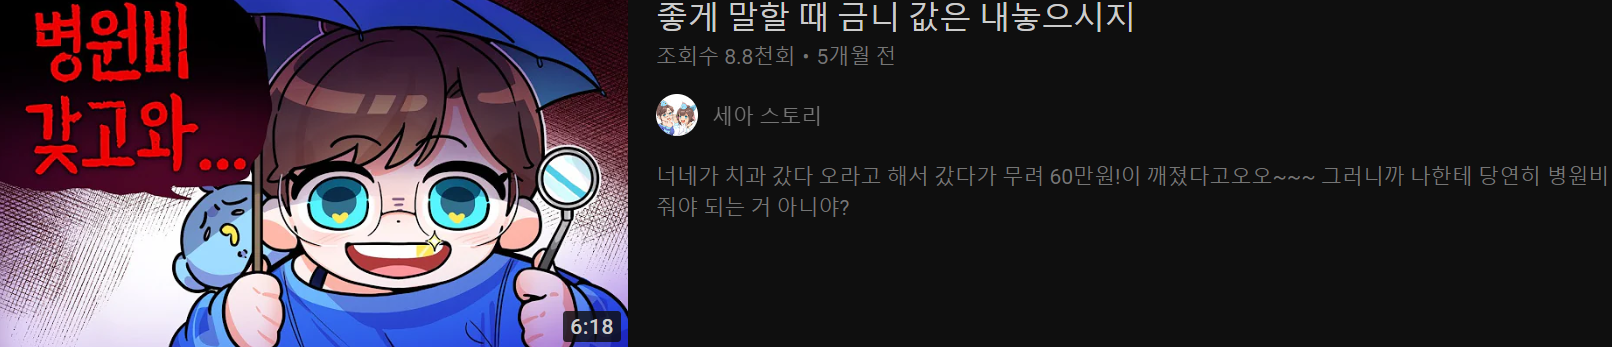

        2. Drive
        : [220422] 마 이것이 (2종 보통) 운전 면허 소지자의 운전이다! [풀영상], https://youtu.be/4UVzE2Y_3Rc -11995-3시간19분53초
        : 그랑프리 우승했습니다, https://youtu.be/FUUqT0ZbrgQ, 7분 13초 (*방송 on : 27분 03초 ~)

        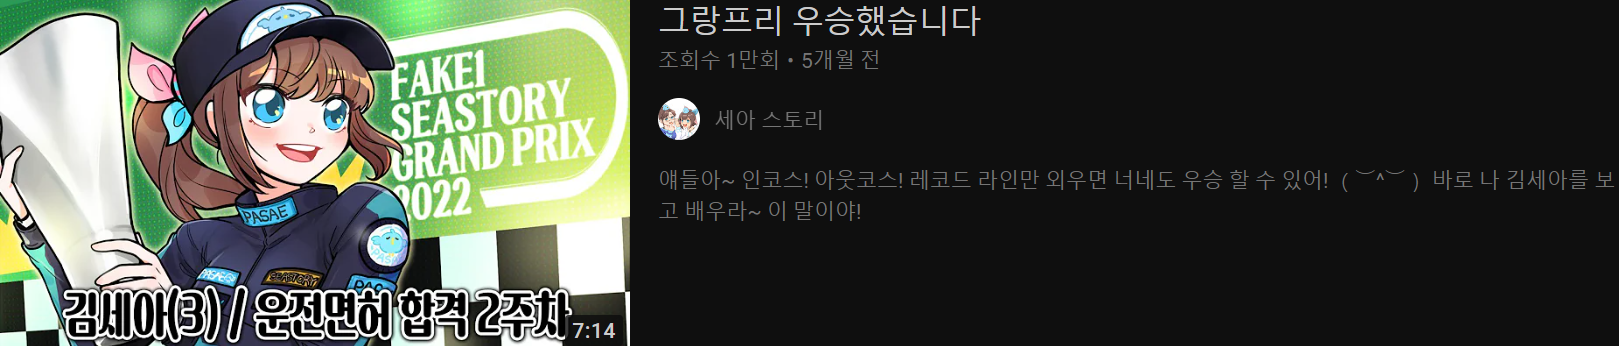

        3. Fact
        : [220405] 극사실주의 빈센트 반세아 - 노래방&팀원 그리기 [풀영상], https://youtu.be/nyMBT7JqK_s -11297-3시간8분15초
        : 달라는 선물은 안 주고 고생만 시킨 1주년 기념 방송, https://youtu.be/3eHGmmp5Zfs, 12분 41초 (*방송 on : 3분 43초 ~)

        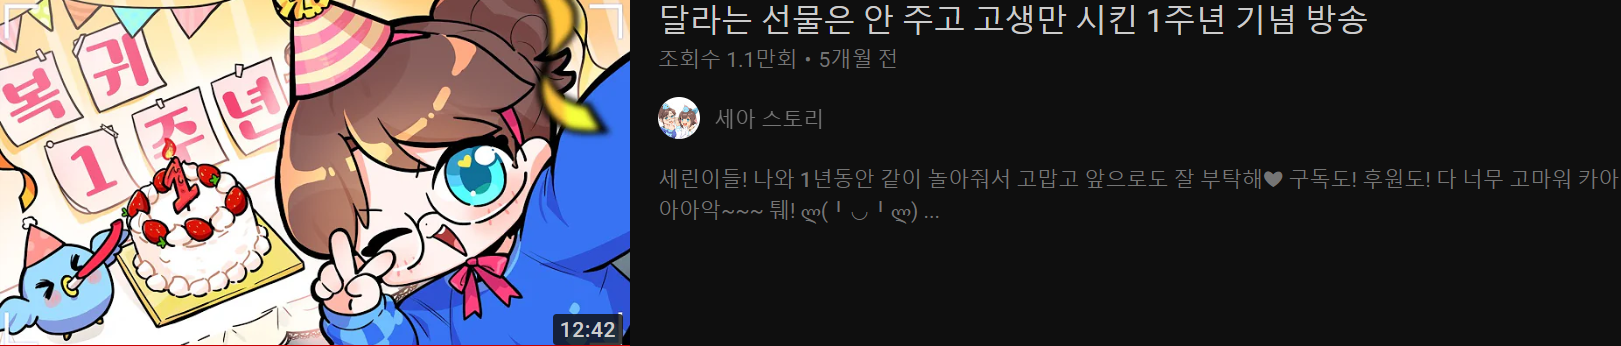

        4. Fortune
        : [220408] 초심자의 행운은 마작에서도 통한다 [풀영상], https://youtu.be/3HARE2tvQdI -12627-3시간30분25초
        : 개못하는 트수 뇨속들... 훈수두지 마라^^, https://youtu.be/ObYiXVYUNFs, 6분 32초 (*방송 on : 28분 06초 ~)

        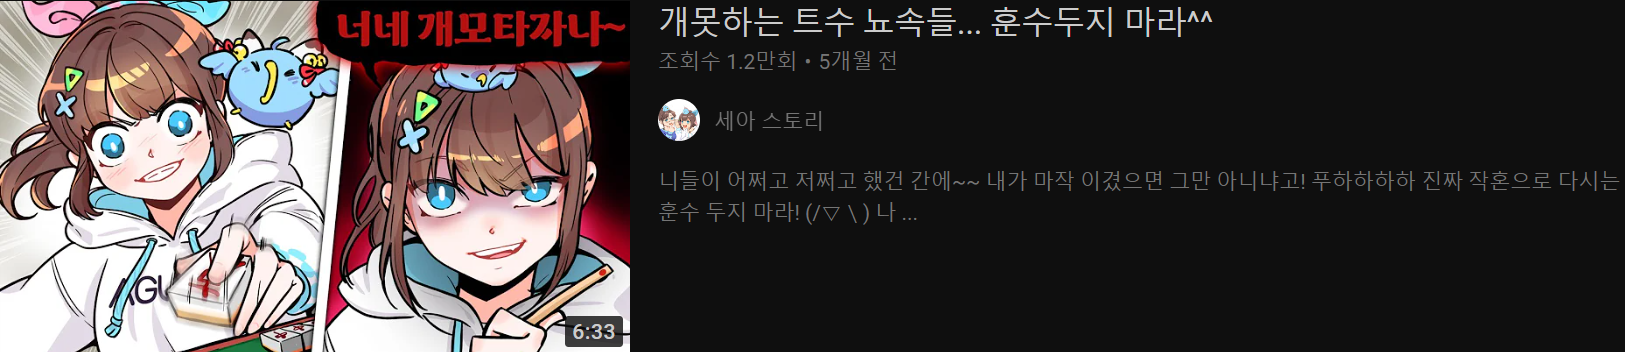

        5. Kart
        : 카트 막자에 당해 온갖 포상을 선사하는 김세아 [풀영상].mp4, https://youtu.be/j_C9UPGGiHs -12999-3시간36분37초
        : 막지마! 막지 말라고! 이 모스 새X야!!!!!!!!, https://youtu.be/UQvDpOj0iZQ, 9분 1초 (*방송 on : 22분 09초 ~)

        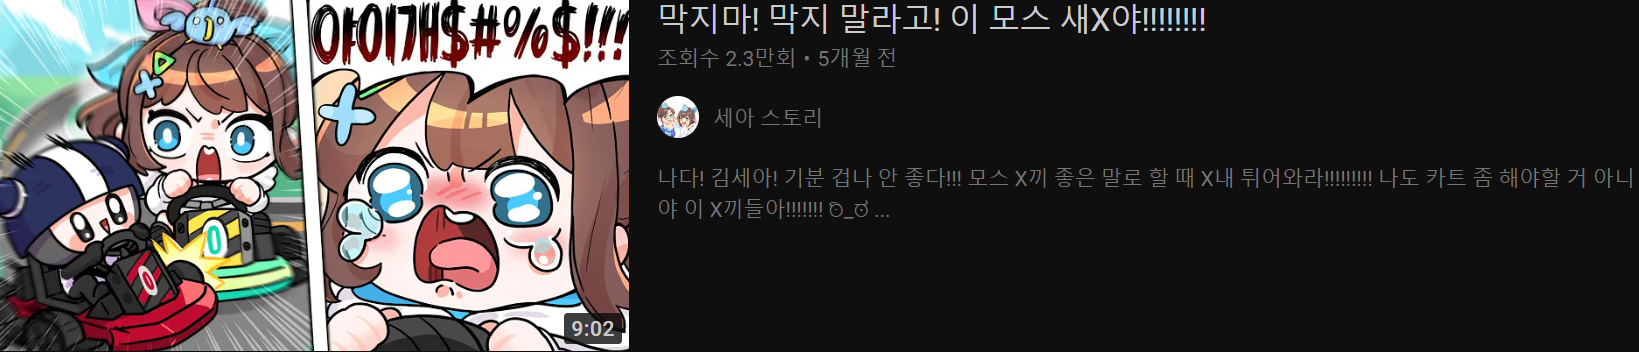
    
 
### - Model(Scene_Text_Detection)
- 문자 영역 인식 모델, CRAFT, NaverClova (https://github.com/clovaai/CRAFT-pytorch)
    - extract_fps : 1fps 
    - result_format : .txt, 4 bounding box coordinates (4 points x1,y1,x2,y2,x3,y3,x4,y4)
    
    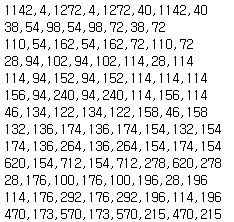

### Dataset Info
    - Video_length (sec)
        1. origin
        2. highlight
    - Number of chats
    - Length of ground truth highlight (sec)

In [56]:
#Video_length (sec)
##1. origin
origin_frame_dic = {'Dentist' : 12335, 'Drive' : 11995, 'Fact' : 11297, 'Fortune' : 12627, 'Kart' : 12999}
np.mean(list(origin_frame_dic.values())), np.std(list(origin_frame_dic.values())), max(list(origin_frame_dic.values())), min(list(origin_frame_dic.values()))

#SEM(Standard Error of Mean)
#from scipy.stats import sem
#sem(list(video_frame_dic.values())), 

(12250.6, 580.2735906449647, 12999, 11297)

In [57]:
##2. highlight

highlight_time_dic = {'Dentist' : '0:06:18', 'Drive' : '0:07:13', 'Fact' : '0:12:41', 'Fortune' : '0:06:32', 'Kart' : '0:09:01'}
highlight_frame = [time_to_frame(t) for t in list(highlight_time_dic.values())]
np.mean(highlight_frame), np.std(highlight_frame), max(highlight_frame), min(highlight_frame)

(501.0, 142.0098588126895, 761, 378)

In [58]:
#Number of chats
video_chat_num = {'Dentist' : 455810, 'Drive' : 468730, 'Fact' : 479826, 'Fortune' : 493962, 'Kart' : 429286}
np.mean(list(video_chat_num.values())), np.std(list(video_chat_num.values())), max(list(video_chat_num.values())), min(list(video_chat_num.values()))

(465522.8, 22050.396444508657, 493962, 429286)

In [59]:
#Length of ground truth highlight (sec)
video_chat_num = {'Dentist' : 336, 'Drive' : 387, 'Fact' : 302, 'Fortune' : 451, 'Kart' : 521}
np.mean(list(video_chat_num.values())), np.std(list(video_chat_num.values())), max(list(video_chat_num.values())), min(list(video_chat_num.values()))

(399.4, 78.87864096192327, 521, 302)

In [ ]:
#Take the length of ground truth highlight (sec)

video_label_dic = {}

for video in video_list:

    label_path = f'C:/Users/jcjo/Desktop/code/NotGit/Chatroom_Video_Analysis/dataset/label/{video}.csv'

    df = pd.read_csv(label_path)

#     label_list = []
    gt_length = 0
    for sb, eb in zip(df['sb'].values, df['eb'].values):
#         print(time_to_frame(sb), time_to_frame(eb))
        gt_length += np.abs(time_to_frame(sb) - time_to_frame(eb))
#         label_list.append((time_to_frame(sb), time_to_frame(eb)))
    print(f"{video}, length: {gt_length}")
#     video_label_dic[video] = label_list

## Setup

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
from scipy.stats import mode
from iteration_utilities import duplicates
from iteration_utilities import unique_everseen

## Model Result
    - CRAFT(Character-Region Awareness For Text detection)

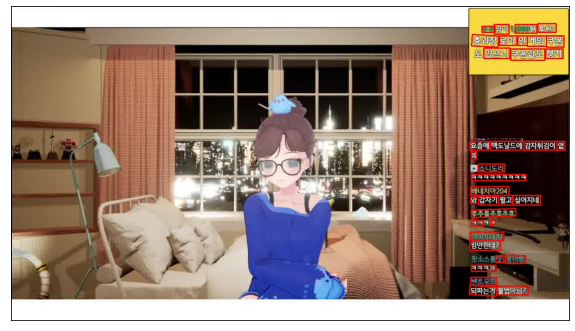

In [3]:
# CRAFT 결과 예시 이미지
# 빨강색 Box ==> 8개의 (x,y) 좌표
image = Image.open('/home/Chatroom_Video_Analysis/dataset/sample/bbox/general0.jpg')

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.imshow(image)
plt.show()

## Utils
    - frame_to_time : 1fps frame을 받아서 시간으로 변환해주는 함수 <-> time_to_frame
    - find_txt : .txt 파일 찾아주는 함수
    - height_width_conversion : # 좌표 8개를 받아서 [높이, 너비]로 바꿔주는 함수

In [4]:
# frame <-> time
def frame_to_time(frame_1fps):

    hour = frame_1fps // 3600
    rest = frame_1fps % 3600
    miniute = rest // 60

    rest = rest % 60
    sec = rest

    print(f"{hour}시, {miniute}분, {sec}초")
    
frame_to_time(12335)

3시, 25분, 35초


In [6]:
def time_to_frame(time):
    hour = int(time[0])
    minute = int(time[2:3+1])
    sec = int(time[5:])
    frame = hour * 3600 + minute * 60 + sec
    
    return frame
time = '2:22:17'
frame_to_time(time_to_frame(time))
print(time_to_frame(time))

2시, 22분, 17초
8537


In [7]:
def find_txt(str_list): # .txt 파일 찾아주는 함수
    txt_list = []
    for str in str_list:
        if str[-4:] == '.txt':
            txt_list.append(str)
    return txt_list

def height_width_conversion(eight_list): # 좌표 8개를 받아서 [높이, 너비]로 바꿔주는 함수
    height = np.abs(int(eight_list[-1]) - int(eight_list[1])) # 높이를 구하는 식
    width = np.abs(int(eight_list[-2]) - int(eight_list[-4])) # 너비를 구하는 식
    return [height, width]

## Merge

In [94]:
#### Merge #####
#text file 불러오기: 채팅창 문자 영역 좌표 txt file by frame of 1fps

video_list = ['Drive', 'Dentist', 'Fortune', 'Kart', 'Fact']
video_highlight_dic = {}

for video in video_list:
    
    print(f"________{video} is running________")
    
    txt_path = f"/home/Chatroom_Video_Analysis/dataset/data/{video}/"
    all_files = os.listdir(txt_path)
    
    #.txt 필터
    txt_files = find_txt(all_files)
    
    #파일 순서 정렬
    txt_files = sorted(txt_files, key=lambda x: -int(x[8:-4]) )
    
    #txt file 각각 text lines(박스 좌표)들을 읽어 txt_list에 넣기
    txt_list = []
    for txt_f in txt_files: 
        with open(f"{txt_path}{txt_f}", "r") as file:
            txt_lines =  file.readlines()
            txt_list.append(txt_lines)
    
    ###Number of chats##### 
            
    #modified text: text file name 전처리하기
    md_txt = [] 
    for txt in txt_list:
        md_txt_s = []
        for b in txt:
            bbox = b.split(',') #, 제거
            last = bbox.pop()
            bbox.append(last.replace('\n', '')) #\n 제거
            md_txt_s.append(bbox)
        md_txt.append(md_txt_s)
    
    # 1개 영상의 모든 프레임에 대한, 8개의 Bounding Box (x,y)값 ==> (width, time(1fps), Norm_y)
    wty_video = []

    time = 0
    for frame in md_txt:
        time += 1
        wty_frame = []

        # 채팅창 총 높이(chatrooom_height) : Normalization , 채팅창의 크기가 가변적이므로
        h_list = [] # init

        for bbox in frame:

            _, w = height_width_conversion(bbox) # width만 : bbox 식별 ID
            wty = [w]
            wty.append(time) # time
            wty.append(int(bbox[1])) # left_upper_y : y값의 변화를 보기 위해, 하나 값 지정 (위의 값을 사용해도 된다.) 
            wty_frame.append(wty)

            # h_list: 1frame의 모든 upper_y, lower_y, 모아준다.
            h_list.append(int(bbox[1])) # upper_y
            h_list.append(int(bbox[-1])) # lower_y
            
        try:
            chatroom_start_y = min(h_list) # 1 frame 당 채팅창 시작 높이 : chatroom_start_y 
            chatrooom_height = max(h_list) - chatroom_start_y # 1 frame 당 채팅창 총 높이 : chatroom_height

            # normalization : (Left_upper_y(wty[2]) - 채팅창의 시작 높이(min(h_list)) ) / (채팅창 총 높이(chatroom_height))
            for wty in wty_frame: 
                wty[2] = (wty[2] - chatroom_start_y) / chatrooom_height
        except: # bbox가 탐색되지 않은 frame
            wty_frame = [[0, time, 0]]
            print("탐색되지 않은 frame_time")
            frame_to_time(time)
            
        # 1 video 당 모든 frame의 bboxes의 (width, time(1fps), Norm_y)
        wty_video.append(wty_frame)
    
    
    # v_list : Velocity list 프레임 당 속도 값을 받아보자
    v_mean = [] # 평균
    v_med = [] # 중앙값
    v_mode = [] # 최빈값

    for fr_num in range(len(wty_video)-1): # -1 : 마지막 프레임은 다음이 없으니까
        v_list_s=[] #프레임 당 초기화
        for bu_box, b_box, bd_box in zip(wty_video[fr_num][:-2], wty_video[fr_num][1:-1], wty_video[fr_num][2:]): # 이전 프레임, 위 지금 아래 bbox
            for au_box, a_box, ad_box in zip(wty_video[fr_num+1][:-2], wty_video[fr_num+1][1:-1], wty_video[fr_num+1][2:]): # 이후 프레임, 위 지금 아래 bbox
                if (b_box[0] == a_box[0]) & ( (bu_box[0] == au_box[0]) | (bd_box[1] == ad_box[0]) ): #지금 bbox width는 같으면서, 위 아래 중 하나만 같으면 -> 같은 bbox로 구분 
                    norm_dist = np.abs(b_box[2] - a_box[2]) # 마진 필요 없음.
                    norm_v = norm_dist / np.abs(b_box[1] - a_box[1]) # 속도는 시간분의 거리
                    v_list_s.append(norm_v)
                else:
                    pass #탐색하지 못하는 경우 pass

        if v_list_s:
            # 1 frame의 대표 속도 구하기        
            v_mean.append(np.mean(v_list_s)) # 평균
            # 평균 --> 중앙값, 최빈값 이론 상으로는 모두 같은 값들이 나와야 한다. 그러나, 채팅창 이외의 text가 우연히 같은 width가 있어 통과된 경우, 발생한 outlier를 완화한다.
            v_med.append(np.median(v_list_s)) # 중앙값 : 짝수 중앙값 그 둘의 평균 ex) np.median([3,4]) : 3.5
            v_mode.append(mode(v_list_s)[0][0]) # 최빈값 : 모두 동일한 빈도라면 최솟값이 나온다. --> 문제 가능성 ex) mode([3,4,5]) : 3

        else: # empty : 탐색 실패시( ex) 채팅창이 존재하지 않는 경우 ) --> 0을 넣는다. (min_velocity= 0) --> 그 frame은 다른 영상 정보가 필요하다.
            v_mean.append(0)
            v_med.append(0)
            v_mode.append(0)
        
    video_highlight_dic[video] = [v_mean, v_med, v_mode]

________Drive is running________
탐색되지 않은 frame_time
2시, 13분, 9초
탐색되지 않은 frame_time
2시, 32분, 45초
탐색되지 않은 frame_time
2시, 54분, 30초
________Dentist is running________
탐색되지 않은 frame_time
1시, 50분, 46초
탐색되지 않은 frame_time
1시, 50분, 49초
탐색되지 않은 frame_time
2시, 11분, 43초
탐색되지 않은 frame_time
2시, 17분, 26초
탐색되지 않은 frame_time
2시, 39분, 32초
탐색되지 않은 frame_time
2시, 46분, 7초
탐색되지 않은 frame_time
2시, 52분, 11초
탐색되지 않은 frame_time
2시, 54분, 21초
탐색되지 않은 frame_time
2시, 54분, 34초
탐색되지 않은 frame_time
3시, 10분, 26초
탐색되지 않은 frame_time
3시, 25분, 14초
________Fortune is running________
탐색되지 않은 frame_time
3시, 24분, 30초
________Kart is running________
탐색되지 않은 frame_time
2시, 39분, 23초
탐색되지 않은 frame_time
3시, 36분, 33초
________Fact is running________


In [146]:
len(video_highlight_dic['Fact'])
# v_mean, v_med, v_mode -> 3개

3

## Step by Step(Explanation)

In [25]:
#data folder에 "세아스토리" 유튜브 영상 문자 영역 인식 결과 자료

video_list = os.listdir("/home/Chatroom_Video_Analysis/dataset/data/")
video_list

['Drive', 'Dentist', 'Fortune', 'Kart', 'Fact']

In [79]:
# Test : 9, 10 frame에 대해 실험해보기

txt_path = f"/home/Chatroom_Video_Analysis/dataset/data/Drive/"

#해당 txt file 안의 박스 좌표들을 읽어 txt_list에 넣기
txt_list = []
for txt_f in ['res_test-9.txt', 'res_test-100.txt']: #txt_files: 
    with open(f"{txt_path}{txt_f}", "r") as file:
        strings =  file.readlines()
        txt_list.append(strings)
txt_list

[['1143,6,1267,6,1267,39,1143,39\n',
  '620,156,716,156,716,282,620,282\n',
  '470,176,568,176,568,216,470,216\n',
  '470,218,568,218,568,260,470,260\n',
  '68,256,210,256,210,276,68,276\n',
  '224,256,264,256,264,276,224,276\n',
  '264,256,306,256,306,278,264,278\n',
  '454,262,588,262,588,304,454,304\n',
  '24,280,64,280,64,300,24,300\n',
  '66,280,106,280,106,302,66,302\n',
  '108,280,222,280,222,302,108,302\n',
  '46,322,156,322,156,344,46,344\n',
  '472,688,506,688,506,718,472,718\n',
  '508,686,602,686,602,720,508,720\n',
  '610,688,704,688,704,718,610,718\n',
  '710,688,862,688,862,720,710,720\n',
  '870,688,930,688,930,718,870,718\n',
  '936,686,999,690,997,719,934,715\n',
  '1006,688,1140,688,1140,720,1006,720\n'],
 ['1146,8,1266,8,1266,40,1146,40\n',
  '186,48,226,48,226,64,186,64\n',
  '228,48,306,48,306,66,228,66\n',
  '28,70,62,70,62,90,28,90\n',
  '66,70,138,70,138,90,66,90\n',
  '142,70,198,70,198,90,142,90\n',
  '200,70,224,70,224,90,200,90\n',
  '222,70,282,70,282,90,2

In [129]:
# Test : Drive video 1개에 대해 실험해보기

txt_path = f"/home/Chatroom_Video_Analysis/dataset/data/Drive/"

all_files = os.listdir(txt_path)

#.txt 필터
txt_files = find_txt(all_files)

#파일 순서 정렬
txt_files = sorted(txt_files, key=lambda x: -int(x[8:-4]) )

#해당 txt file 안의 박스 좌표들을 읽어 txt_list에 넣기
txt_list = []
for txt_f in txt_files: #txt_files: 
    with open(f"{txt_path}{txt_f}", "r") as file:
        strings =  file.readlines()
        txt_list.append(strings)
len(txt_list)

11995

In [130]:
md_txt = [] #modified text: text file name 전처리하기
for txt in txt_list:
    md_txt_s = []
    for b in txt:
        bbox = b.split(',') #, 제거
        last = bbox.pop()
        bbox.append(last.replace('\n', ''))
        md_txt_s.append(bbox)
    md_txt.append(md_txt_s)
len(md_txt)

11995

In [138]:
# 1개 영상의 모든 프레임에 대한, 8개의 Bounding Box (x,y)값 ==> (width, time(1fps), Norm_y)
wty_video = []

time = 0
for frame in md_txt:
    time += 1
    wty_frame = []

    # 채팅창 총 높이(chatroom_height) : Normalization , 채팅창의 크기가 가변적이므로
    h_list = [] # init

    for bbox in frame:
        
        _, w = height_width_conversion(bbox) # width만 : bbox 식별 ID
        wty = [w]
        wty.append(time) # time
        wty.append(int(bbox[1])) # left_upper_y : y값의 변화를 보기 위해, 하나 값 지정 (위의 값을 사용해도 된다.) 
        wty_frame.append(wty)

        # h_list: 1frame의 모든 upper_y, lower_y, 모아준다.
        h_list.append(int(bbox[1])) # upper_y
        h_list.append(int(bbox[-1])) # lower_y
    try:
        chatroom_start_y = min(h_list) # 1 frame 당 채팅창 시작 높이 : chatroom_start_y 
        chatrooom_height = max(h_list) - chatroom_start_y # 1 frame 당 채팅창 총 높이 : chatroom_height
        
        # normalization : (Left_upper_y(wty[2]) - 채팅창의 시작 높이(min(h_list)) ) / (채팅창 총 높이(chatroom_height))
        for wty in wty_frame: 
            wty[2] = (wty[2] - chatroom_start_y) / chatrooom_height
    except: # bbox가 탐색되지 않은 frame
        wty_frame = [[0, time, 0]]
        print("탐색되지 않은 frame_time")
        frame_to_time(time)
    # 1 video 당 모든 frame의 bboxes의 (width, time(1fps), Norm_y)
    wty_video.append(wty_frame)
len(wty_video)

탐색되지 않은 frame_time
2시, 13분, 9초
탐색되지 않은 frame_time
2시, 32분, 45초
탐색되지 않은 frame_time
2시, 54분, 30초


11995

### - 1st problem
- 어떻게 이전, 이후 프레임의 특정 bbox 분간해낼 수 있을까?

### - 1st Solution
- 특정 bbox를 구분하기 위해, 위 아래의 bbox 중 적어도 하나가 동일한지 확인한다. (중복 방지)
- 맨 위이거나 맨 아래인 경우는, 위, 아래 bbox가 없기에 적어도 하나만 확인한다.

In [91]:
# 위, 나, 아래 bbox를 이전 이후 frame에 대해 나열해 봤을 때
# 과연 width로 얼마나 구분이 가능할까?
for a, b, c, x, y, z in zip(wty_video[0][:-2], wty_video[0][1:-1], wty_video[0][2:], wty_video[1][:-2], wty_video[1][1:-1], wty_video[1][2:]): #이전 box, 현재 box, 다음 box
    print(f"before_frame: up_{a[0]}, {b[0]}, down_{c[0]}, |after_frame : up_{x[0]}, {y[0]}, down_{z[0]}") # width가 45인 경우가 두번 중복되는 경우 발생.

before_frame: up_124, 96, down_98, |after_frame : up_120, 40, down_78
before_frame: up_96, 98, down_98, |after_frame : up_40, 78, down_34
before_frame: up_98, 98, down_142, |after_frame : up_78, 34, down_72
before_frame: up_98, 142, down_40, |after_frame : up_34, 72, down_56
before_frame: up_142, 40, down_42, |after_frame : up_72, 56, down_24
before_frame: up_40, 42, down_134, |after_frame : up_56, 24, down_60
before_frame: up_42, 134, down_40, |after_frame : up_24, 60, down_22
before_frame: up_134, 40, down_40, |after_frame : up_60, 22, down_74
before_frame: up_40, 40, down_114, |after_frame : up_22, 74, down_50
before_frame: up_40, 114, down_110, |after_frame : up_74, 50, down_36
before_frame: up_114, 110, down_34, |after_frame : up_50, 36, down_42
before_frame: up_110, 34, down_94, |after_frame : up_36, 42, down_110
before_frame: up_34, 94, down_94, |after_frame : up_42, 110, down_18
before_frame: up_94, 94, down_152, |after_frame : up_110, 18, down_48
before_frame: up_94, 152, down

### 용어 정의
    1. 이전 이후 frame : before, after -> b, a
    2. 위 지금 아래 bbox : up, "", down -> u, "", d
    ex) bu_box : upper bbox of before frame

In [95]:
# 이전 이후 프레임에서, 위 지금 아래 bbox들을 비교한다.
    # zip() -> X : 이전 이후 프레임의 bbox 개수가 다른데, 적은 개수 만큼만 탐색하기 때문이다.
for bu_box, b_box, bd_box in zip(wty_video[0][:-2], wty_video[0][1:-1], wty_video[0][2:]): 
        for au_box, a_box, ad_box in zip(wty_video[1][:-2], wty_video[1][1:-1], wty_video[1][2:]):
            if (b_box[0] == a_box[0]) & ( (bu_box[0] == au_box[0]) | (bd_box[1] == ad_box[0]) ):
                print((bu_box[0], b_box[0], bd_box[0]) , (au_box[0], a_box[0], ad_box[0]))
# width가 45로 중복된 것을 걸러내는 데 성공했다. (검증 완료.)
# 단 1개만 탐지되더라도, 해당 채팅방의 변화 속도를 구할 수 있다.

(152, 60, 63) (152, 60, 64)


In [139]:
# v_list : Velocity list 프레임 당 속도 값을 받아보자
v_mean = [] # 평균
v_med = [] # 중앙값
v_mode = [] # 최빈값

for fr_num in range(len(wty_video)-1): # -1 : 마지막 프레임은 다음이 없으니까
    v_list_s=[] #프레임 당 초기화
    for bu_box, b_box, bd_box in zip(wty_video[fr_num][:-2], wty_video[fr_num][1:-1], wty_video[fr_num][2:]): # 이전 프레임, 위 지금 아래 bbox
        for au_box, a_box, ad_box in zip(wty_video[fr_num+1][:-2], wty_video[fr_num+1][1:-1], wty_video[fr_num+1][2:]): # 이후 프레임, 위 지금 아래 bbox
            if (b_box[0] == a_box[0]) & ( (bu_box[0] == au_box[0]) | (bd_box[1] == ad_box[0]) ): #지금 bbox width는 같으면서, 위 아래 중 하나만 같으면 -> 같은 bbox로 구분 
                norm_dist = np.abs(b_box[2] - a_box[2]) #+1 마진 필요 없음.
                norm_v = norm_dist / np.abs(b_box[1] - a_box[1]) # 속도는 시간분의 거리
                v_list_s.append(norm_v)
            else:
                pass #탐색하지 못하는 경우 pass

    if v_list_s:
        # 1 frame의 대표 속도 구하기        
        v_mean.append(np.mean(v_list_s)) # 평균
        # 평균 --> 중앙값, 최빈값 이론 상으로는 모두 같은 값들이 나와야 한다. 그러나, 채팅창 이외의 text가 우연히 같은 width가 있어 통과된 경우, 발생한 outlier를 완화한다.
        v_med.append(np.median(v_list_s)) # 중앙값 : 짝수 중앙값 그 둘의 평균 ex) np.median([3,4]) : 3.5
        v_mode.append(mode(v_list_s)[0][0]) # 최빈값 : 모두 동일한 빈도라면 최솟값이 나온다. --> 문제 가능성 ex) mode([3,4,5]) : 3
        
    else: # empty : 탐색 실패시( ex) 채팅창이 존재하지 않는 경우 ) --> 0을 넣는다. --> 그 frame은 다른 영상 정보가 필요하다.
        v_mean.append(0)
        v_med.append(0)
        v_mode.append(0)

In [140]:
len(v_mean), len(v_med), len(v_mode) # 총 11995 frame의 데이터 중, 11994개의 프레임간 비교 값이 나왔다.
# 왜 1개가 적나? 맨 2개씩 쌍으로 비교하기에 1개가 적다.

(11994, 11994, 11994)

In [125]:
v_mean, v_med, v_mode

([1.0001258930538508], [1.0001258930538508], [1.0001258930538508])

### - 2st problem
- 영상의 특성 상, 탐색하지 못하는 시간 구간이 발생하게 되었다.

### - 2st Solution
- Character Recognition 뿐만 아니라, 영상의 소리 음성 인식을 추가 정보로 고려하도록 한다.

In [9]:
video_list = ['Drive', 'Dentist', 'Fortune', 'Kart', 'Fact']

### Label
    - highlight time range tagging
    - 5 videos

In [10]:
# Take label highlight 

video_label_dic = {}

for video in video_list:

    label_path = f'/home/Chatroom_Video_Analysis/dataset/label/{video}.csv'

    df = pd.read_csv(label_path)

    label_list = []
    for sb, eb in zip(df['sb'].values, df['eb'].values):
#         print(time_to_frame(sb), time_to_frame(eb))
        label_list.append((time_to_frame(sb), time_to_frame(eb)))

    video_label_dic[video] = label_list

In [11]:
video_label_dic

{'Drive': [(8537, 8594),
  (8673, 8682),
  (8685, 8687),
  (8706, 8729),
  (8751, 8762),
  (9064, 9075),
  (9099, 9118),
  (9320, 9326),
  (9331, 9342),
  (9361, 9392),
  (10252, 10261),
  (10304, 10337),
  (10546, 10562),
  (10606, 10614),
  (10637, 10646),
  (10723, 10759),
  (10769, 10780),
  (10893, 10904),
  (10949, 10959),
  (10978, 10987),
  (10989, 10993)],
 'Dentist': [(5170, 5249),
  (5480, 5487),
  (5695, 5720),
  (5789, 5804),
  (6102, 6136),
  (6681, 6706),
  (7900, 7918),
  (7985, 7994),
  (8017, 8030),
  (8978, 8990),
  (8998, 9003),
  (9075, 9113),
  (9220, 9223),
  (9227, 9235),
  (9241, 9247),
  (9258, 9273),
  (10277, 10288),
  (10297, 10311),
  (10314, 10322),
  (10380, 10384),
  (10433, 10444),
  (10632, 10659)],
 'Fortune': [(6422, 6435),
  (6443, 6448),
  (6475, 6477),
  (6490, 6495),
  (6496, 6499),
  (6592, 6602),
  (6615, 6628),
  (6747, 6752),
  (9033, 9041),
  (9137, 9156),
  (9664, 9675),
  (9897, 9902),
  (9911, 9916),
  (10865, 10868),
  (10921, 10937),
 

In [298]:
# 중복 검사
for video in video_list:
    print(f"________{video} highlight Result________")
    v_mean = list(map(lambda x: x > 1.1, video_highlight_dic[video][0]))
    v_med = list(map(lambda x: x > 1.1, video_highlight_dic[video][1]))
    v_mode = list(map(lambda x: x > 1.1, video_highlight_dic[video][2]))
    
    print(len(video_highlight_dic[video][0]) == len(set(video_highlight_dic[video][0])))
    print(len(video_highlight_dic[video][1]) == len(set(video_highlight_dic[video][1])))
    print(len(video_highlight_dic[video][2]) == len(set(video_highlight_dic[video][2])))

________Drive highlight Result________
False
False
False
________Dentist highlight Result________
False
False
False
________Fortune highlight Result________
False
False
False
________Kart highlight Result________
False
False
False
________Fact highlight Result________
False
False
False


In [14]:
def ret_idx_above_thres(data, threshold):
    
    """
    threshold값 보다 크거나 같은 data의 값의 index를 반환해주는 함수.
    """
    
    # 중복 항 추출
    dup = list(unique_everseen(duplicates(data)))
    # 중복항 조건 통과
    dup_thres = [d for d in dup if d >= threshold]
    # 조건 통과 중복 항의 인덱스 찾기
    idx_list = list(filter(lambda x : data[x] in dup_thres, range(len(data)) ) )
    # 전체에 대해 조건 통과 인덱스 찾기
    for idx in [data.index(t) for t in data if t >= threshold]:
        idx_list.append(idx)
    
    return list(set(idx_list)) # 중복 제거 및 반환

test = [3, 5, 8, 1, 2, 7, 8, 5]
thres = 6
conditioned_retrive_index(test, thres)

[2, 5, 6]

# Evaluation
    - mean, median, mode
    - thres_0.5, thres_0.7
    
    1. Quantative
        - Recall
        - Precison
        - F1-Score
    
    2. Qualative
        - Graph

________Drive highlight Result________


<Figure size 432x288 with 0 Axes>

________2.Median_Velocity________
thres_mean: 0.02, thres_0.3:0.29, thres_0.5:0.48, thres_0.7:0.67


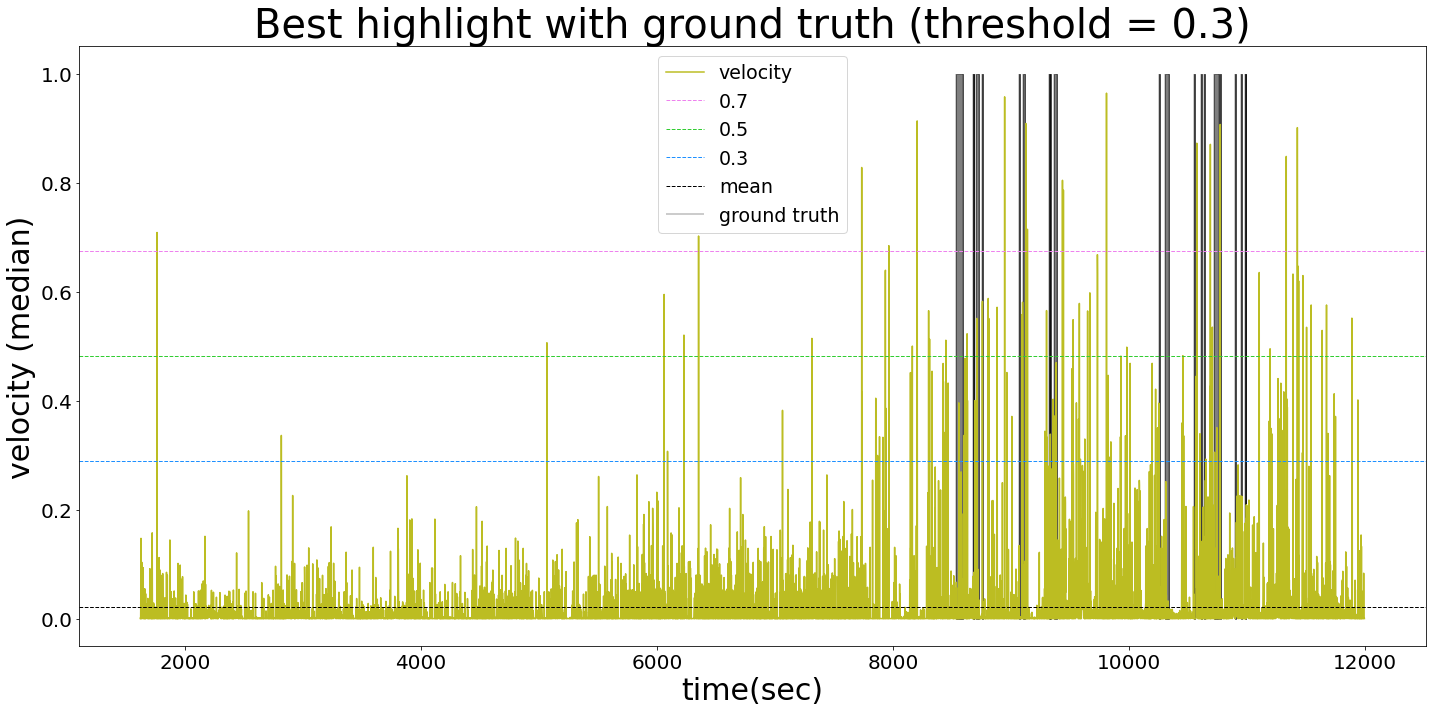

<Figure size 432x288 with 0 Axes>

________Dentist highlight Result________


<Figure size 432x288 with 0 Axes>

________2.Median_Velocity________
thres_mean: 0.03, thres_0.3:0.26, thres_0.5:0.44, thres_0.7:0.62


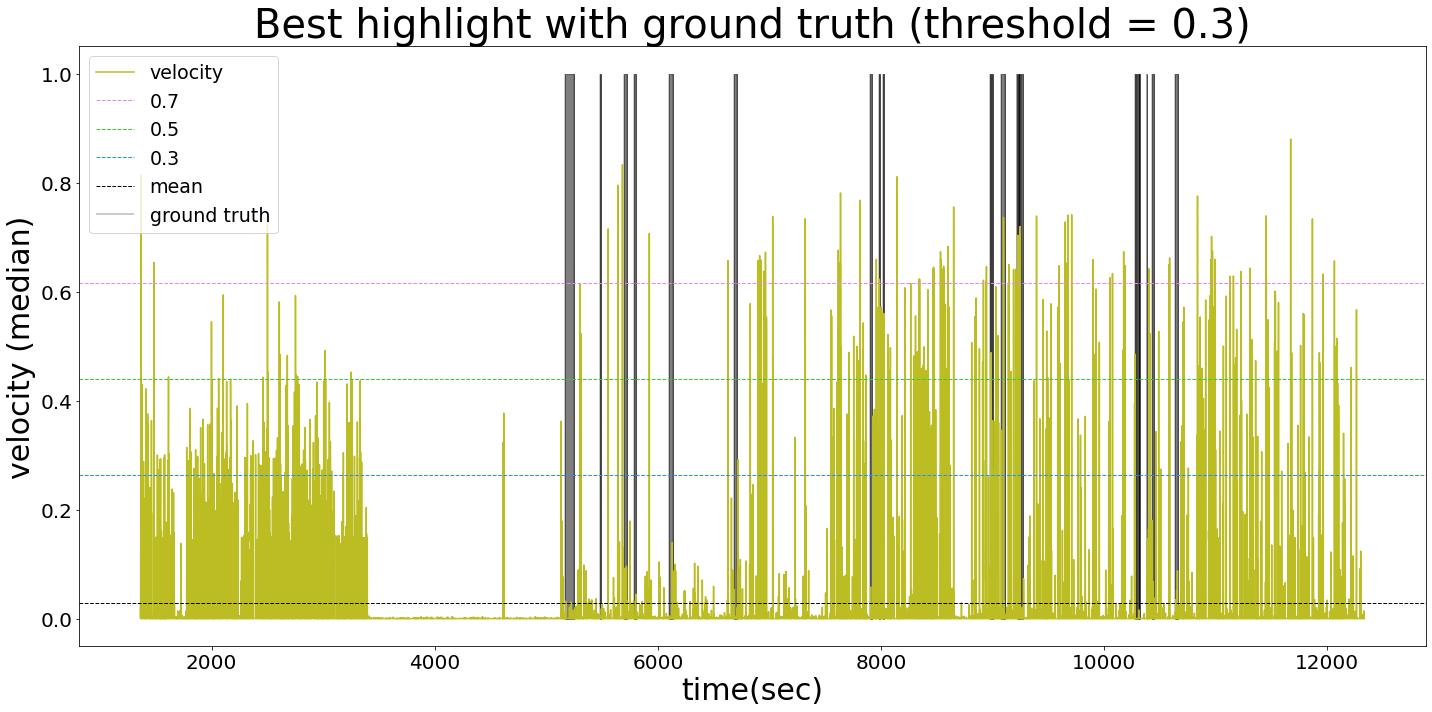

<Figure size 432x288 with 0 Axes>

________Fortune highlight Result________


<Figure size 432x288 with 0 Axes>

________2.Median_Velocity________
thres_mean: 0.01, thres_0.3:0.23, thres_0.5:0.38, thres_0.7:0.53


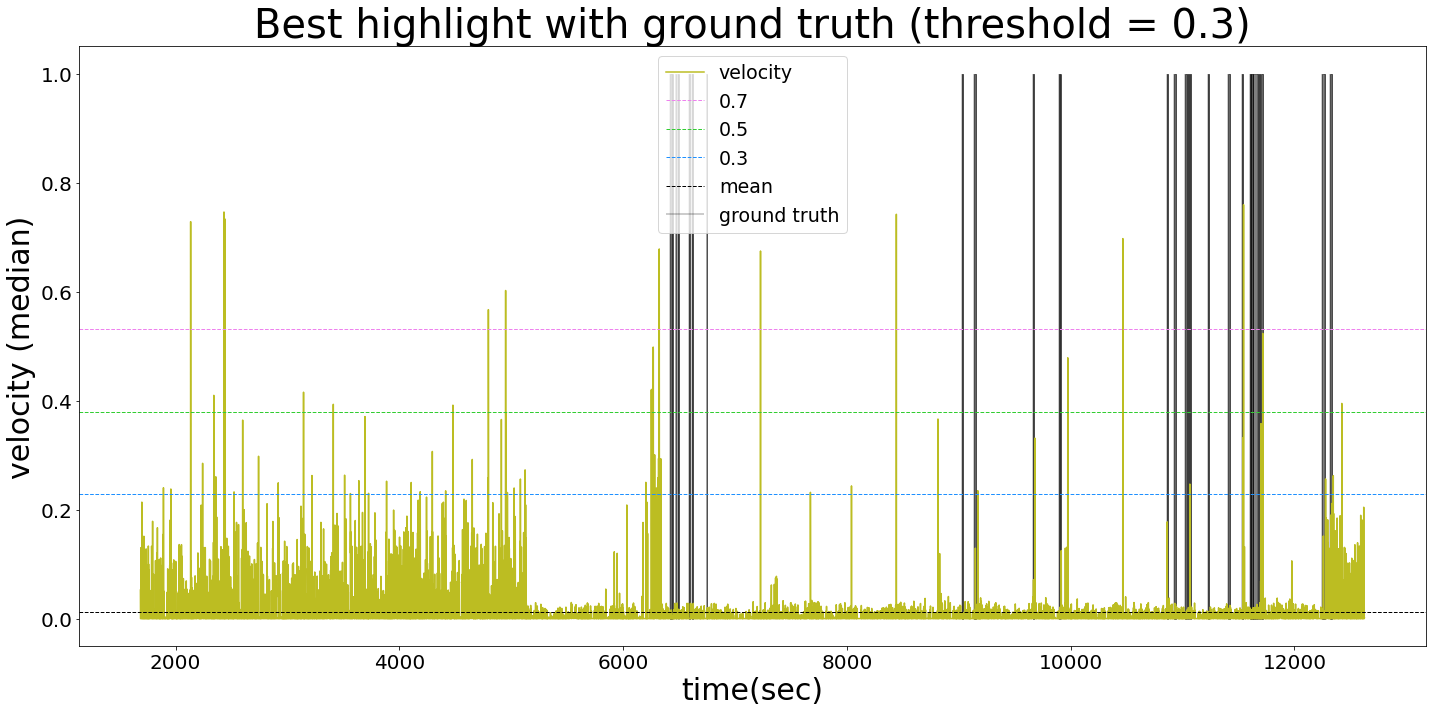

<Figure size 432x288 with 0 Axes>

________Kart highlight Result________


<Figure size 432x288 with 0 Axes>

________2.Median_Velocity________
thres_mean: 0.02, thres_0.3:0.28, thres_0.5:0.47, thres_0.7:0.66


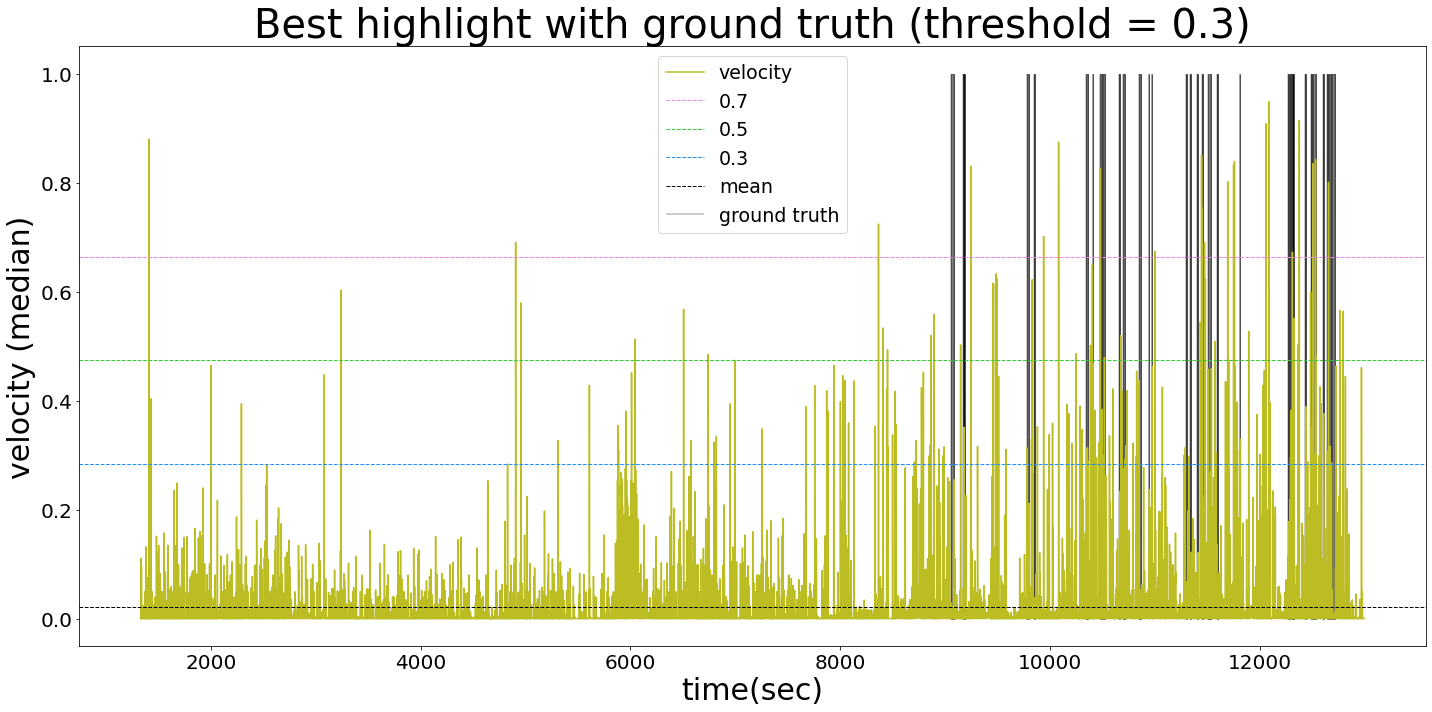

<Figure size 432x288 with 0 Axes>

________Fact highlight Result________


<Figure size 432x288 with 0 Axes>

________2.Median_Velocity________
thres_mean: 0.03, thres_0.3:0.24, thres_0.5:0.4, thres_0.7:0.56


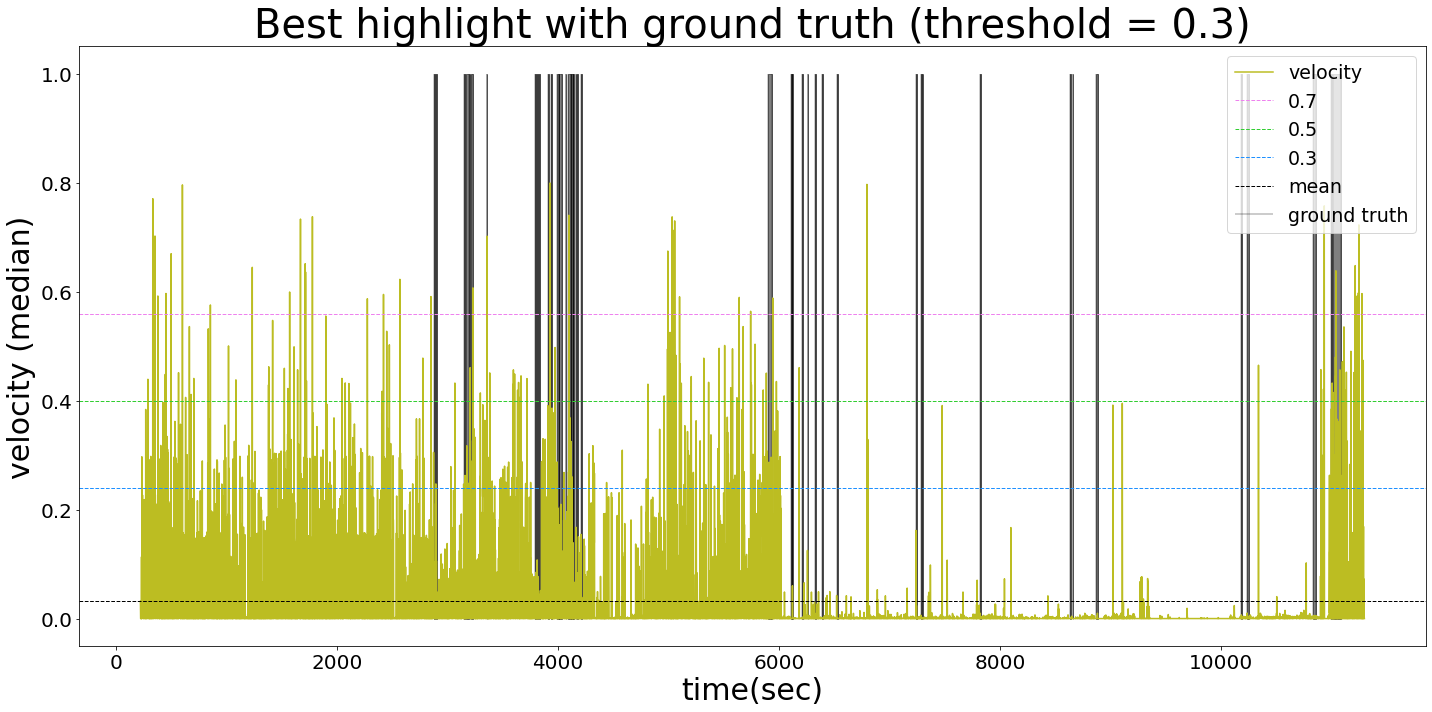

<Figure size 432x288 with 0 Axes>

In [101]:
####thres_03####
# plt.subplot()

video_list = ['Drive', 'Dentist', 'Fortune', 'Kart', 'Fact']
show_start = {'Dentist' : '0:22:41', 'Drive' : '0:27:03', 'Fact' : '0:03:43', 'Fortune' : '0:28:06', 'Kart' : '0:22:09'}
title_list = ['Mean', 'Median', 'Mode']
color_list = ['violet', 'C8', 'dodgerblue']



for video in video_list:
    
    print(f"________{video} highlight Result________")
    #실제 정답 개수
    true_num = len(video_label_dic[video])
    print(f"True_num : {true_num}")
    
    
    for (idx, y), title, color in zip(enumerate(video_highlight_dic[video]), title_list, color_list):
        
        if idx == 1: #Median_Velocity
        
            print(f"________{idx+1}.{title}_Velocity________")

            x = np.arange(len(y))
            
            # 방송 준비 시간 제외하고 그리기(No highlight)
            start_fr = time_to_frame(show_start[video])
            
            fig = plt.figure(figsize=(20,10))
            
            # 하얀 바탕으로
            fig.patch.set_facecolor('xkcd:white')
            plt.subplot(3, 1, idx+1)
            plt.plot(x[start_fr:],y[start_fr:], color, label = 'velocity')
            
            plt.title(f"Best highlight with ground truth (threshold = 0.3)", fontdict={'fontsize': 40})
            
            plt.xlabel('time(sec)', fontdict={'fontsize': 30})
            plt.ylabel('velocity (median)', fontdict={'fontsize': 30})
            
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            
            ##### threshold #####
            thres_mean = np.mean(y)
            thres_03 = ((max(y) - min(y)) * 0.3)
            thres_05 = ((max(y) - min(y)) * 0.5)
            thres_07 = ((max(y) - min(y)) * 0.7)
            print(f"thres_mean: {round(thres_mean, 2)}, thres_0.3:{round(thres_03, 2)}, thres_0.5:{round(thres_05, 2)}, thres_0.7:{round(thres_07, 2)}")

            #map - for positive count (map : bool/ filter: 값)
            y_03 = list(map(lambda x: x > thres_03, y))
            y_05 = list(map(lambda x: x > thres_05, y))
            y_07 = list(map(lambda x: x > thres_07, y))
            print(f"y_05:{y_05}, y_07:{y_07}")

            #algorith positive count
            positive_03_num = np.sum(y_03)
            positive_05_num = np.sum(y_05)
            positive_07_num = np.sum(y_07)
            print(f"Positive_0.3_num : {positive_03_num}")
            print(f"Positive_0.5_num : {positive_05_num}")
            print(f"Positive_0.7_num : {positive_07_num}")

    #         # 중복 검사
    #         print("0.5", len(y_05) == len(set(y_05)))
    #         print("0.7", len(y_07) == len(set(y_07)))

            # 수평선(threshold) 긋기
           
            plt.axhline(thres_07, color='violet', linestyle='--',  linewidth = 1, label='0.7')
            plt.axhline(thres_05, color='limegreen', linestyle='--',  linewidth = 1, label='0.5')
            plt.axhline(thres_03, color='dodgerblue', linestyle='--',  linewidth = 1, label='0.3')
            plt.axhline(thres_mean, color='black', linestyle='--',  linewidth = 1, label='mean')
            
            # ground truth 영역 표시하기
            for start, end in video_label_dic[video]:
                plt.vlines(start, 0, 1, color='black', linestyle='-',  linewidth = 0.4, label='ground truth')
                plt.vlines(end, 0, 1, color='black', linestyle='-', linewidth = 0.4)
                plt.fill_between([start, end], 0, 1, color='black', alpha=0.5)
                
            # 범례(legend) 추가하기
            labels = ['velocity', '0.7', '0.5', '0.3', 'mean', 'ground truth']
            plt.legend(prop={'size':19}, labels=labels)


            #####eval#########
            ########0.3######

            correct_03 = 0
            
            조건에 따라 ground truth 영역 그려주기
            for idx_t in conditioned_retrive_index(y, thres_03):

                for start, end in video_label_dic[video]:

                    if idx_t >= start and idx_t <= end:
    #                     correct_03 += 1
                        plt.axvline(start, color='black', linestyle='-',  linewidth = 1)
                        plt.axvline(end, color='black', linestyle='-', linewidth = 1)
                        plt.fill_between([start, end], 1, 2, color='violet', alpha=1)
                    else:
                        plt.axvline(start, color='black', linestyle='-',  linewidth = 1)
                        plt.axvline(end, color='black', linestyle='-', linewidth = 1)
                        plt.fill_between([start, end], 1, 2, color='dodgerblue', alpha=1)

            print(f"______evaluation_____")
            recall = correct_03/true_num
            precision = correct_03/positive_03_num
            f1_score = 2*(precision*recall)/(precision+recall)
            print(f"recall_0.3 : {round(recall, 2)}")
            print(f"precision_0.3 : {round(precision, 2)}")
            print(f"F1-score_0.3 : {round(f1_score, 2)}")

        plt.tight_layout()
        plt.show()

#### thres 0.5

________Drive highlight Result________
True_num : 21
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 49
Positive_0.7_num : 16
______evaluation_____
recall_0.5 : 0.14
precision_0.5 : 0.06
F1-score_0.5 : 0.09
________2.Median_Velocity________
thres_mean: 1.02, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 62
Positive_0.7_num : 16
______evaluation_____
recall_0.5 : 0.19
precision_0.5 : 0.06
F1-score_0.5 : 0.1
________3.Mode_Velocity________
thres_mean: 1.02, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 52
Positive_0.7_num : 16
______evaluation_____
recall_0.5 : 0.1
precision_0.5 : 0.04
F1-score_0.5 : 0.05


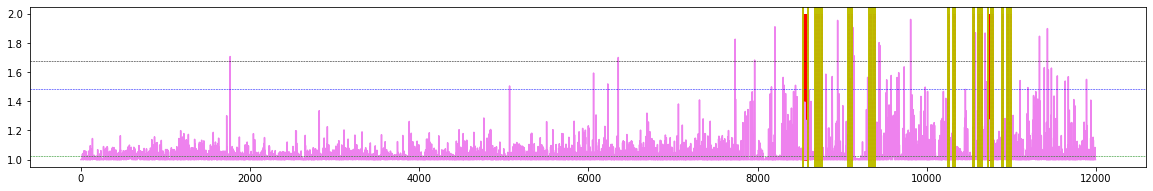

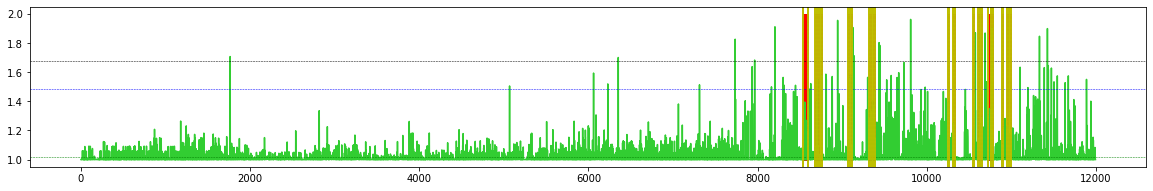

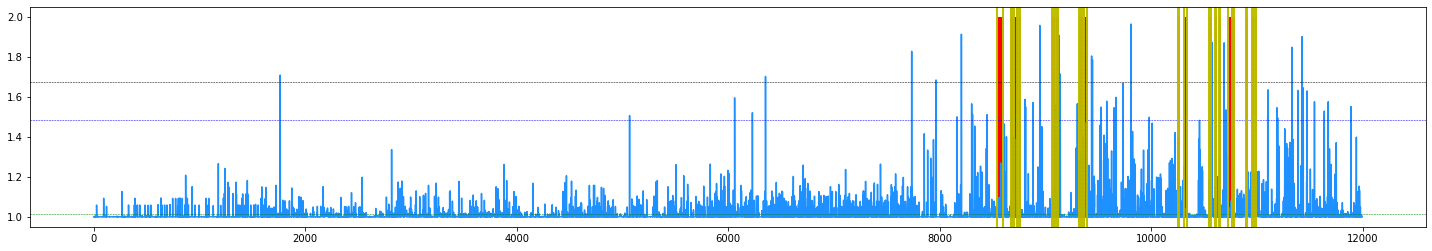

________Dentist highlight Result________
True_num : 22
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 203
Positive_0.7_num : 71
______evaluation_____
recall_0.5 : 0.36
precision_0.5 : 0.04
F1-score_0.5 : 0.07
________2.Median_Velocity________
thres_mean: 1.03, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 205
Positive_0.7_num : 76
______evaluation_____
recall_0.5 : 0.36
precision_0.5 : 0.04
F1-score_0.5 : 0.07
________3.Mode_Velocity________
thres_mean: 1.02, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 171
Positive_0.7_num : 74
______evaluation_____
recall_0.5 : 0.32
precision_0.5 : 0.04
F1-score_0.5 : 0.07


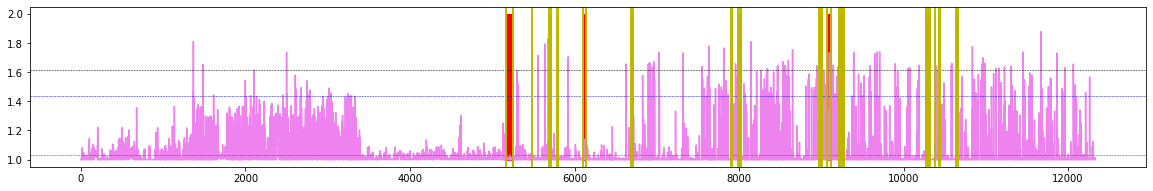

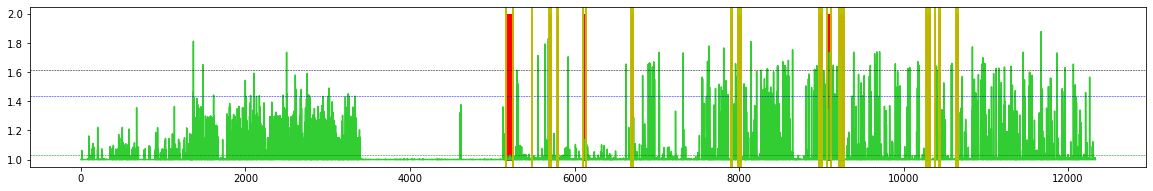

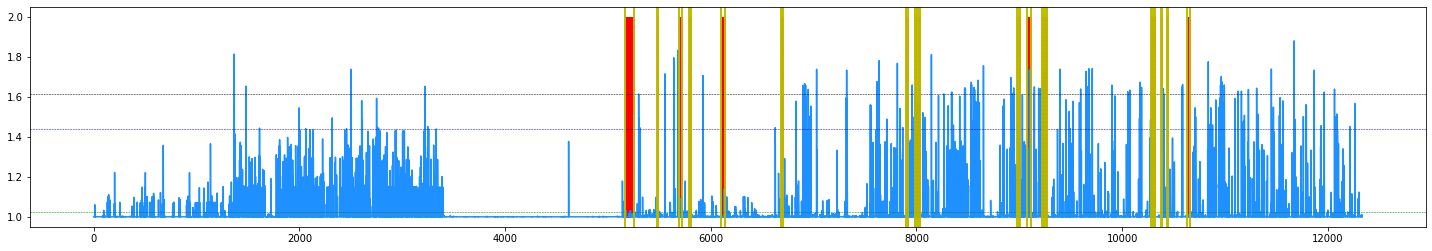

________Fortune highlight Result________
True_num : 28
________1.Mean_Velocity________
thres_mean: 1.02, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 23
Positive_0.7_num : 9
______evaluation_____
recall_0.5 : 0.04
precision_0.5 : 0.04
F1-score_0.5 : 0.04
________2.Median_Velocity________
thres_mean: 1.01, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 23
Positive_0.7_num : 10
______evaluation_____
recall_0.5 : 0.04
precision_0.5 : 0.04
F1-score_0.5 : 0.04
________3.Mode_Velocity________
thres_mean: 1.01, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 19
Positive_0.7_num : 7
______evaluation_____
recall_0.5 : 0.0
precision_0.5 : 0.0
F1-score_0.5 : nan


/tmp/ipykernel_853/983581424.py:72: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(precision*recall)/(precision+recall)


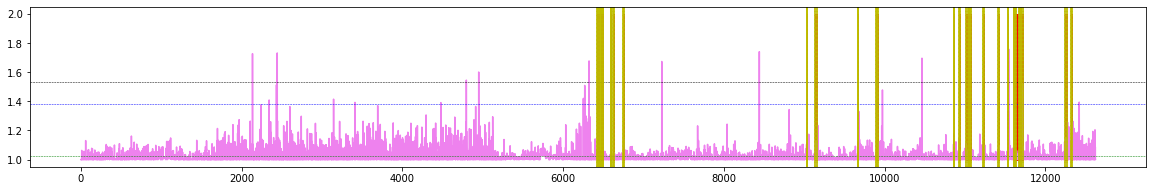

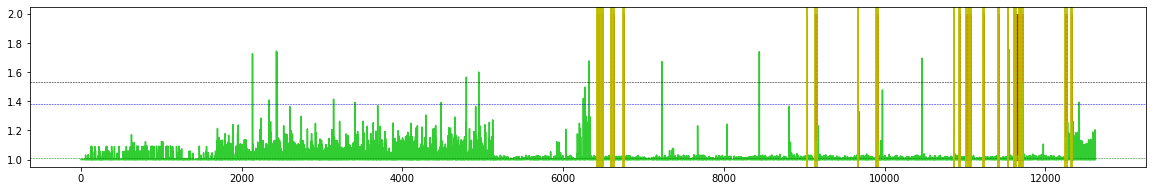

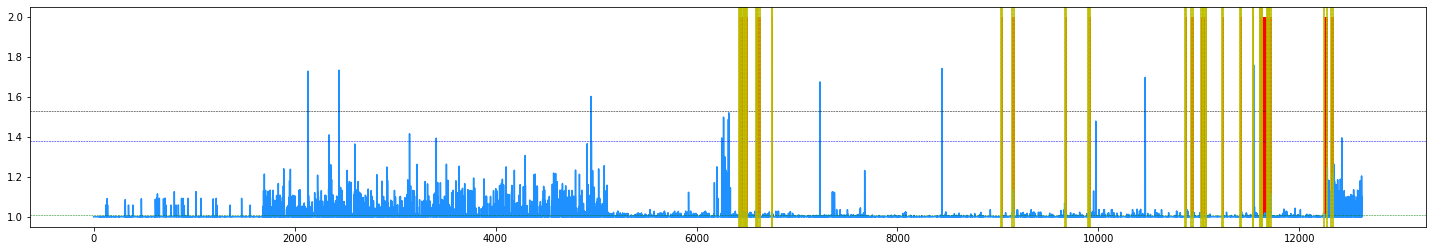

________Kart highlight Result________
True_num : 32
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 54
Positive_0.7_num : 20
______evaluation_____
recall_0.5 : 0.16
precision_0.5 : 0.09
F1-score_0.5 : 0.12
________2.Median_Velocity________
thres_mean: 1.02, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 56
Positive_0.7_num : 22
______evaluation_____
recall_0.5 : 0.16
precision_0.5 : 0.09
F1-score_0.5 : 0.11
________3.Mode_Velocity________
thres_mean: 1.01, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 52
Positive_0.7_num : 18
______evaluation_____
recall_0.5 : 0.12
precision_0.5 : 0.08
F1-score_0.5 : 0.1


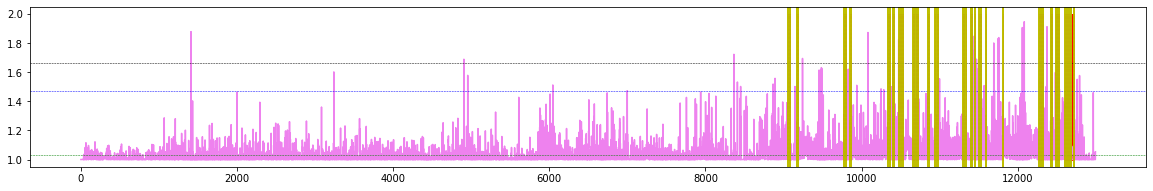

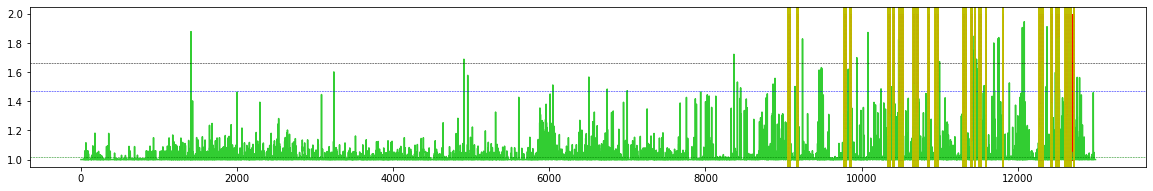

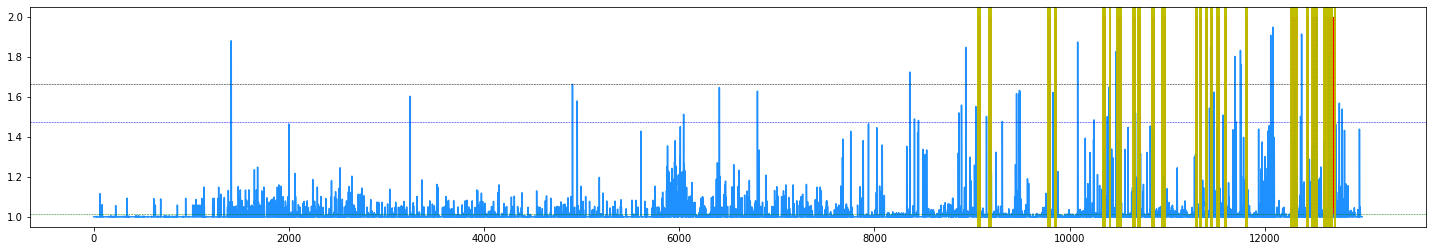

________Fact highlight Result________
True_num : 41
________1.Mean_Velocity________
thres_mean: 1.04, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 118
Positive_0.7_num : 38
______evaluation_____
recall_0.5 : 0.15
precision_0.5 : 0.05
F1-score_0.5 : 0.08
________2.Median_Velocity________
thres_mean: 1.03, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 126
Positive_0.7_num : 40
______evaluation_____
recall_0.5 : 0.2
precision_0.5 : 0.06
F1-score_0.5 : 0.1
________3.Mode_Velocity________
thres_mean: 1.03, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 108
Positive_0.7_num : 36
______evaluation_____
recall_0.5 : 0.15
precision_0.5 : 0.06
F1-score_0.5 : 0.08


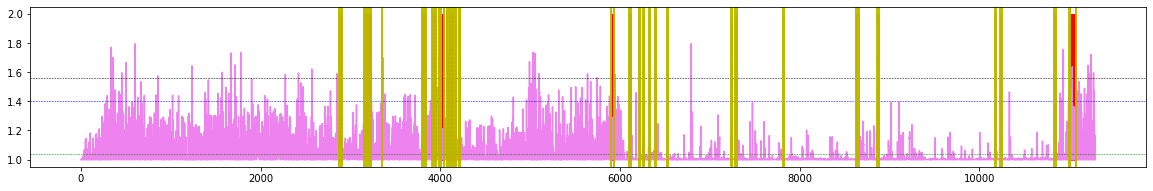

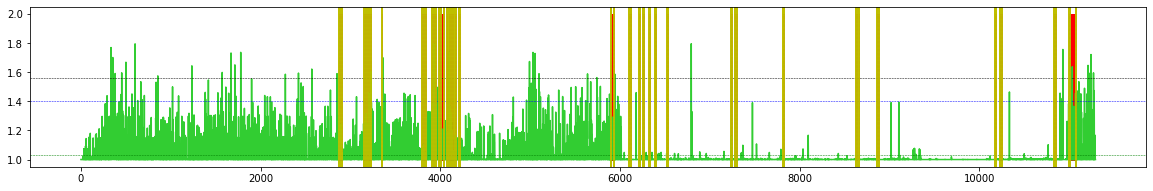

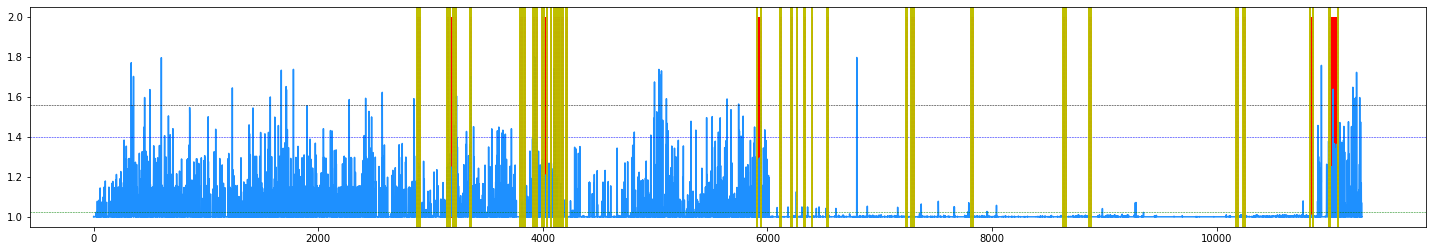

In [31]:
####thres_05####
# plt.subplot()

title_list = ['Mean', 'Median', 'Mode']
color_list = ['violet', 'limegreen', 'dodgerblue']



for video in video_list:
    
    print(f"________{video} highlight Result________")
    true_num = len(video_label_dic[video])
    print(f"True_num : {true_num}")
    
    
    for (idx, y), title, color in zip(enumerate(video_highlight_dic[video]), title_list, color_list):
        
        print(f"________{idx+1}.{title}_Velocity________")
        
        x = np.arange(len(y))
        
        plt.figure(figsize=(20,10))
        
        plt.subplot(3, 1, idx+1)
        plt.plot(x,y, color)
        ##### threshold #####
        thres_mean = np.mean(y)
        thres_05 = 1 + ((max(y) - 1) * 0.5)
        thres_07 = 1 + ((max(y) - 1) * 0.7)
        print(f"thres_mean: {round(thres_mean, 2)}, thres_0.5:{round(thres_05, 2)}, thres_0.7:{round(thres_07, 2)}")
        
        #map - for positive count (map : bool/ filter: 값)
        y_05 = list(map(lambda x: x > thres_05, y))
        y_07 = list(map(lambda x: x > thres_07, y))
#         print(f"y_05:{y_05}, y_07:{y_07}")
        
        #algorith positive count
        positive_05_num = np.sum(y_05)
        positive_07_num = np.sum(y_07)
        print(f"Positive_0.5_num : {positive_05_num}")
        print(f"Positive_0.7_num : {positive_07_num}")
        
#         # 중복 검사
#         print("0.5", len(y_05) == len(set(y_05)))
#         print("0.7", len(y_07) == len(set(y_07)))
        
        # 수평선(threshold) 긋기
        plt.axhline(thres_mean, color='g', linestyle='--',  linewidth = 0.5)
        plt.axhline(thres_05, color='b', linestyle='--',  linewidth = 0.5)
        plt.axhline(thres_07, color='black', linestyle='--',  linewidth = 0.5)
        
        correct_05 = 0
        
        #####eval#########
        ########0.5######
        for idx_t in conditioned_retrive_index(y, thres_05):
            
            for start, end in video_label_dic[video]:
                
                if idx_t >= start and idx_t <= end:
                    correct_05 += 1
                    plt.axvline(start, color='y', linestyle='--',  linewidth = 0.25)
                    plt.axvline(end, color='y', linestyle='--', linewidth = 0.25)
                    plt.fill_between([start, end], 1, 2, color='b', alpha=0.5)
                else:
                    plt.axvline(start, color='y', linestyle='--',  linewidth = 0.25)
                    plt.axvline(end, color='y', linestyle='--', linewidth = 0.25)
                    plt.fill_between([start, end], 1, 2, color='r', alpha=0.5)
        
        print(f"______evaluation_____")
        recall = correct_05/true_num
        precision = correct_05/positive_05_num
        f1_score = 2*(precision*recall)/(precision+recall)
        print(f"recall_0.5 : {round(recall, 2)}")
        print(f"precision_0.5 : {round(precision, 2)}")
        print(f"F1-score_0.5 : {round(f1_score, 2)}")

    
    plt.tight_layout()
    plt.show()

#### thres 0.7

________Drive highlight Result________
True_num : 21
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 49
Positive_0.7_num : 16
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05
________2.Median_Velocity________
thres_mean: 1.02, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 62
Positive_0.7_num : 16
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05
________3.Mode_Velocity________
thres_mean: 1.02, thres_0.5:1.48, thres_0.7:1.67
Positive_0.5_num : 52
Positive_0.7_num : 16
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05


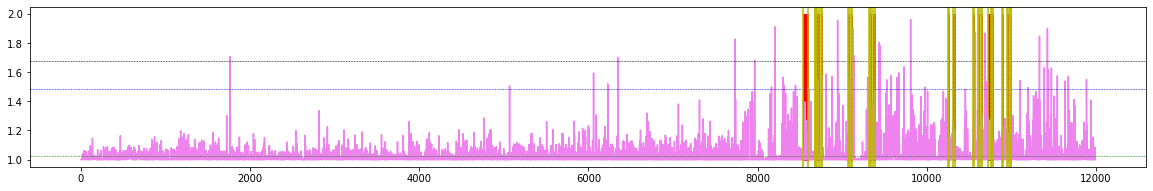

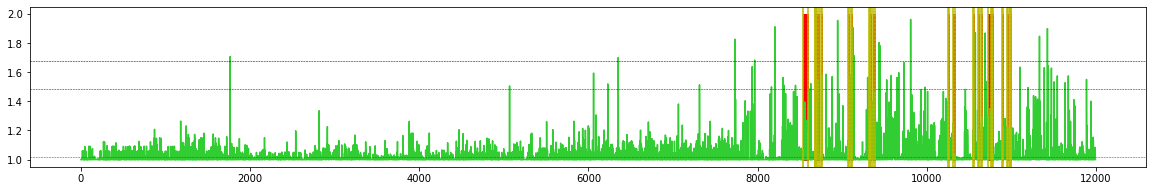

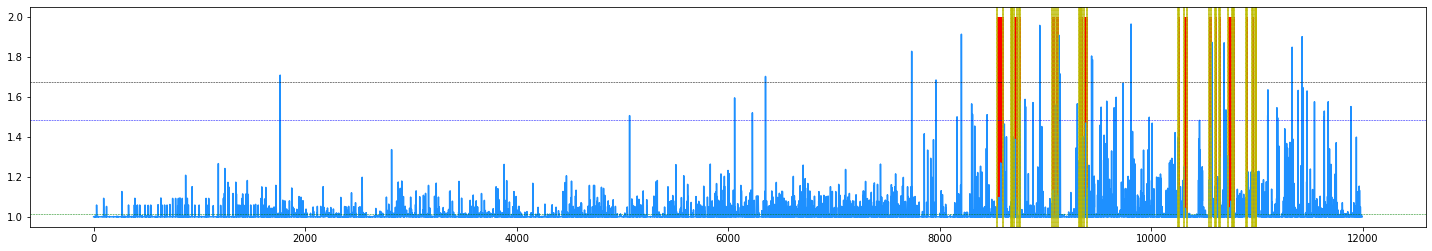

________Dentist highlight Result________
True_num : 22
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 203
Positive_0.7_num : 71
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.11
________2.Median_Velocity________
thres_mean: 1.03, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 205
Positive_0.7_num : 76
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.1
________3.Mode_Velocity________
thres_mean: 1.02, thres_0.5:1.44, thres_0.7:1.62
Positive_0.5_num : 171
Positive_0.7_num : 74
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.1


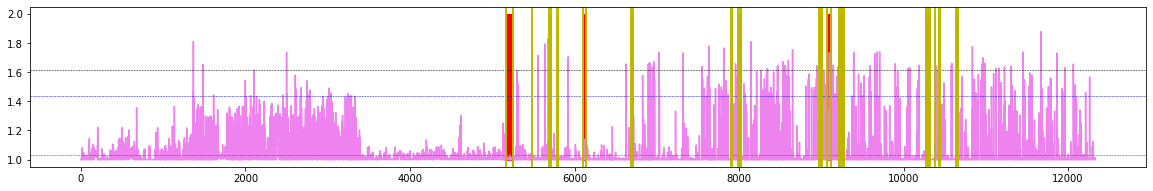

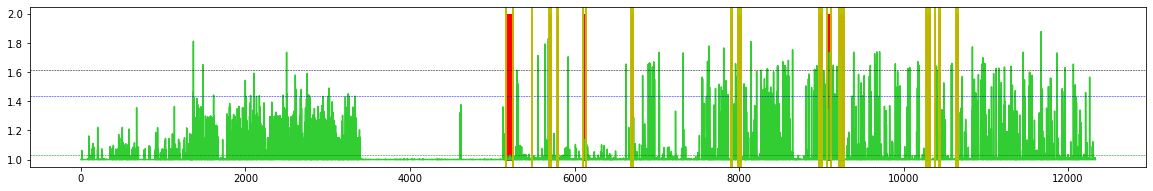

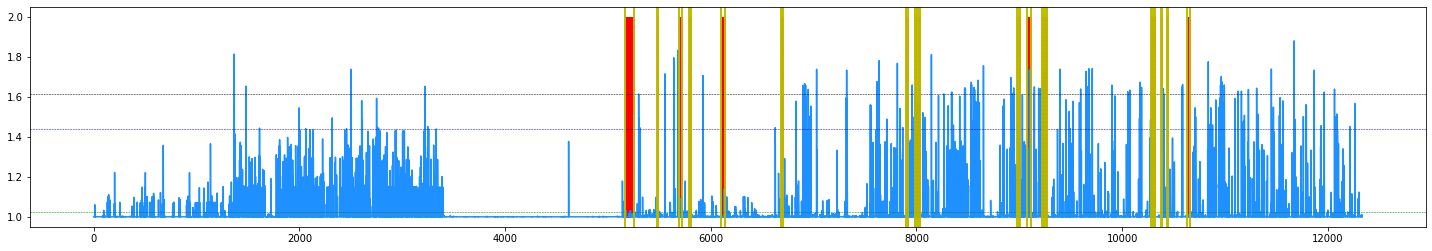

________Fortune highlight Result________
True_num : 28
________1.Mean_Velocity________
thres_mean: 1.02, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 23
Positive_0.7_num : 9
______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan
________2.Median_Velocity________
thres_mean: 1.01, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 23
Positive_0.7_num : 10


/tmp/ipykernel_853/62697357.py:73: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(precision*recall)/(precision+recall)


______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan
________3.Mode_Velocity________
thres_mean: 1.01, thres_0.5:1.38, thres_0.7:1.53
Positive_0.5_num : 19
Positive_0.7_num : 7


/tmp/ipykernel_853/62697357.py:73: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(precision*recall)/(precision+recall)


______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan


/tmp/ipykernel_853/62697357.py:73: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(precision*recall)/(precision+recall)


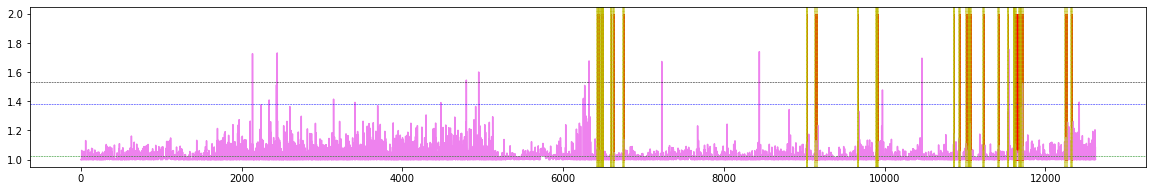

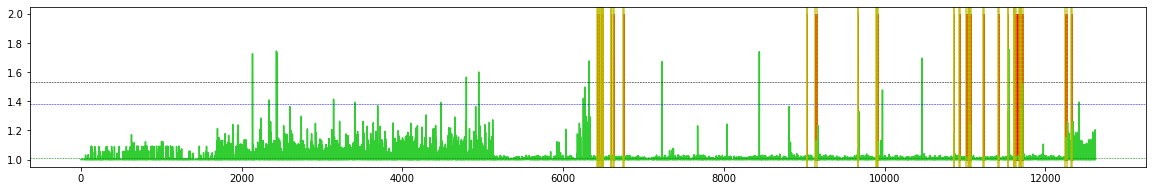

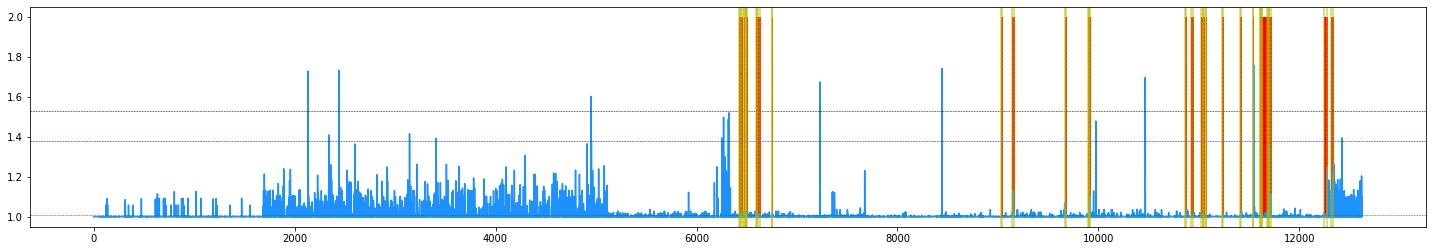

________Kart highlight Result________
True_num : 32
________1.Mean_Velocity________
thres_mean: 1.03, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 54
Positive_0.7_num : 20
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.1
F1-score_0.7 : 0.08
________2.Median_Velocity________
thres_mean: 1.02, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 56
Positive_0.7_num : 22
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.09
F1-score_0.7 : 0.07
________3.Mode_Velocity________
thres_mean: 1.01, thres_0.5:1.47, thres_0.7:1.66
Positive_0.5_num : 52
Positive_0.7_num : 18
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.11
F1-score_0.7 : 0.08


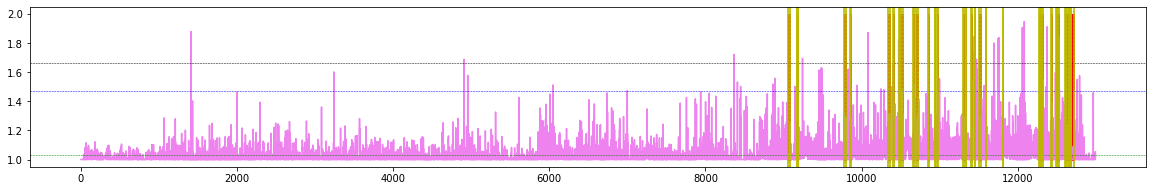

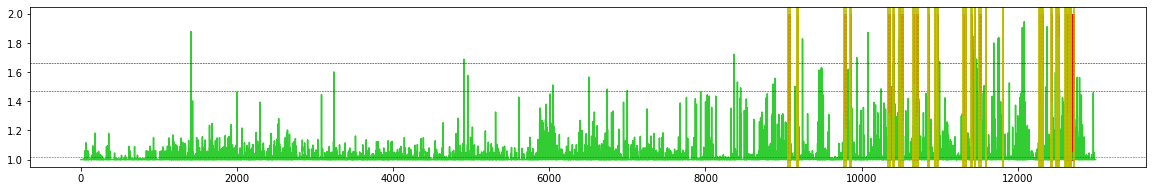

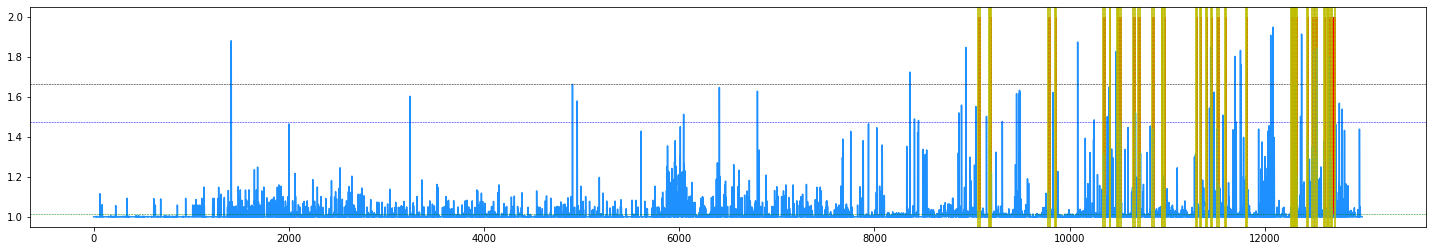

________Fact highlight Result________
True_num : 41
________1.Mean_Velocity________
thres_mean: 1.04, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 118
Positive_0.7_num : 38
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.05
F1-score_0.7 : 0.05
________2.Median_Velocity________
thres_mean: 1.03, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 126
Positive_0.7_num : 40
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.05
F1-score_0.7 : 0.05
________3.Mode_Velocity________
thres_mean: 1.03, thres_0.5:1.4, thres_0.7:1.56
Positive_0.5_num : 108
Positive_0.7_num : 36
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05


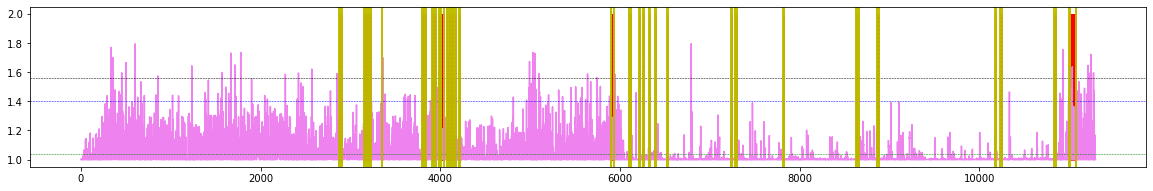

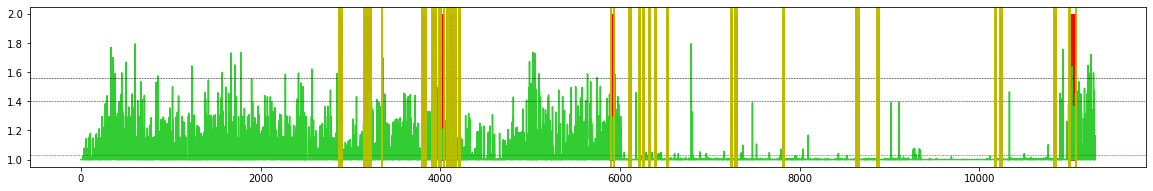

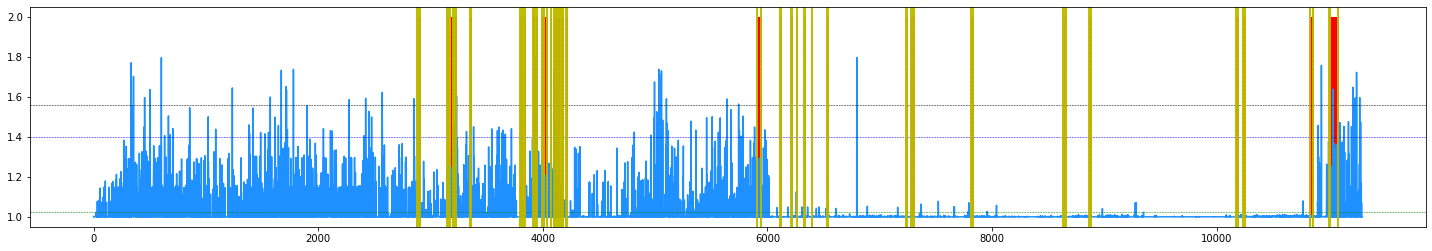

In [32]:
#####0.7######
# plt.subplot()

title_list = ['Mean', 'Median', 'Mode']
color_list = ['violet', 'limegreen', 'dodgerblue']



for video in video_list:
    
    print(f"________{video} highlight Result________")
    true_num = len(video_label_dic[video])
    print(f"True_num : {true_num}")
    
    
    for (idx, y), title, color in zip(enumerate(video_highlight_dic[video]), title_list, color_list):
        
        print(f"________{idx+1}.{title}_Velocity________")
        
        x = np.arange(len(y))
        
        plt.figure(figsize=(20,10))
        
        plt.subplot(3, 1, idx+1)
        plt.plot(x,y, color)
        ##### threshold #####
        thres_mean = np.mean(y)
        thres_05 = 1 + ((max(y) - 1) * 0.5)
        thres_07 = 1 + ((max(y) - 1) * 0.7)
        print(f"thres_mean: {round(thres_mean, 2)}, thres_0.5:{round(thres_05, 2)}, thres_0.7:{round(thres_07, 2)}")
        
        
        #map - for positive count (map : bool/ filter: 값)
        y_05 = list(map(lambda x: x > thres_05, y))
        y_07 = list(map(lambda x: x > thres_07, y))
#         print(f"y_05:{y_05}, y_07:{y_07}")
        
        #algorith positive count
        positive_05_num = np.sum(y_05)
        positive_07_num = np.sum(y_07)
        print(f"Positive_0.5_num : {positive_05_num}")
        print(f"Positive_0.7_num : {positive_07_num}")
        
#         # 중복 검사
#         print("0.5", len(y_05) == len(set(y_05)))
#         print("0.7", len(y_07) == len(set(y_07)))
        
        # threshold 수평선 긋기
        plt.axhline(thres_mean, color='g', linestyle='--',  linewidth = 0.5)
        plt.axhline(thres_05, color='b', linestyle='--',  linewidth = 0.5)
        plt.axhline(thres_07, color='black', linestyle='--',  linewidth = 0.5)
        
        correct_07 = 0
        
        #####eval#########
        ########0.7######
        for idx_t in conditioned_retrive_index(y, thres_07):
            
            for start, end in video_label_dic[video]:
                
                if idx_t >= start and idx_t <= end:
                    correct_07 += 1
                    plt.axvline(start, color='y', linestyle='--',  linewidth = 0.25)
                    plt.axvline(end, color='y', linestyle='--', linewidth = 0.25)
                    plt.fill_between([start, end], 1, 2, color='b', alpha=0.5)
                else:
                    plt.axvline(start, color='y', linestyle='--',  linewidth = 0.25)
                    plt.axvline(end, color='y', linestyle='--', linewidth = 0.25)
                    plt.fill_between([start, end], 1, 2, color='r', alpha=0.5)
        
        print(f"______evaluation_____")
        recall = correct_07/true_num
        precision = correct_07/positive_07_num
        f1_score = 2*(precision*recall)/(precision+recall)
        print(f"recall_0.7 : {round(recall, 2)}")
        print(f"precision_0.7 : {round(precision, 2)}")
        print(f"F1-score_0.7 : {round(f1_score, 2)}")
    
    plt.tight_layout()
    plt.show()

#### Experiment& Evaluation
    - mean, med, mode
    - threshold
        1. 0.3
        2. 0.5
        3. 0.7

In [ ]:
## 보기에 thres 0.3 이 좋다.
## 보기에 Median이 좋다. 과연 결과는>>? 0.3/ Median!!!

In [70]:
# Final 0.3+Median
recall_03_med = [0.48, 0.5, 0.11, 0.88, 0.76]
print(np.mean(recall_03_med), np.std(recall_03_med), max(recall_03_med), min(recall_03_med))
precision_03_med = [ 0.07, 0.02, 0.04, 0.14, 0.07]
print(np.mean(precision_03_med), np.std(precision_03_med), max(precision_03_med), min(precision_03_med))
F1_score_03_med = [0.12, 0.04, 0.06, 0.25, 0.13]
print(np.mean(F1_score_03_med), np.std(F1_score_03_med), max(F1_score_03_med), min(F1_score_03_med))

0.546 0.26605262637305427 0.88 0.11
0.068 0.04069397989875161 0.14 0.02
0.12 0.07348469228349534 0.25 0.04


In [ ]:
# Final 0.3+Median
_Drive
______evaluation_____
recall_0.3 : 0.48
precision_0.3 : 0.07
F1-score_0.3 : 0.12

Dentist
______evaluation_____
recall_0.3 : 0.5
precision_0.3 : 0.02
F1-score_0.3 : 0.04
    

Fortune
______evaluation_____
recall_0.3 : 0.11
precision_0.3 : 0.04
F1-score_0.3 : 0.06
    
Kart
______evaluation_____
recall_0.3 : 0.88
precision_0.3 : 0.14
F1-score_0.3 : 0.25
    
_Fact
______evaluation_____
recall_0.3 : 0.76
precision_0.3 : 0.07
F1-score_0.3 : 0.13

In [62]:
#Mean
mean_recall = [0.48, 0.14, 0.05, 0.5, 0.36, 0.23, 0.11, 0.04, 0.0, 0.88, 0.16, 0.06, 0.8, 0.15, 0.05]
print(np.mean(mean_recall), np.std(mean_recall))
mean_precision = [0.06, 0.06, 0.06, 0.02, 0.04, 0.07, 0.04, 0.04, 0.0, 0.13, 0.09, 0.1, 0.07, 0.05, 0.05]
print(np.mean(mean_precision), np.std(mean_precision))
mean_F1_score = [0.11, 0.09, 0.05, 0.04, 0.07, 0.11, 0.06, 0.04, 0.23, 0.12, 0.08, 0.13, 0.08, 0.05]
print(np.mean(mean_F1_score), np.std(mean_F1_score))

0.26733333333333337 0.27022130847798725
0.05866666666666667 0.03073904502239601
0.09 0.048255273583012966


In [63]:
#Median
med_recall = [0.48, 0.19, 0.05, 0.5, 0.36, 0.23, 0.11, 0.04, 0.0, 0.88, 0.16, 0.06, 0.76, 0.2, 0.05]
print(np.mean(med_recall), np.std(med_recall))
med_precision = [0.07, 0.06, 0.06, 0.02, 0.04, 0.07, 0.04, 0.04, 0.0, 0.14, 0.09, 0.07, 0.06, 0.05]
print(np.mean(med_precision), np.std(med_precision))
med_F1_score = [0.12, 0.1, 0.05, 0.04, 0.07, 0.1, 0.06, 0.04, 0.25, 0.11, 0.07, 0.13, 0.1, 0.05]
print(np.mean(med_F1_score), np.std(med_F1_score))

0.27133333333333337 0.26262436207548523
0.057857142857142864 0.031663086084716435
0.09214285714285717 0.05253278859484827


In [64]:
#Mode
mode_recall = [0.29, 0.1, 0.05, 0.5, 0.32, 0.23, 0.04, 0.44, 0.12, 0.06, 0.63, 0.15, 0.05]
print(np.mean(mode_recall), np.std(mode_recall))
mode_precision = [0.06, 0.04, 0.06, 0.03, 0.04, 0.07, 0.02, 0.11, 0.08, 0.11, 0.07, 0.06, 0.06]
print(np.mean(mode_precision), np.std(mode_precision))
mode_F1_score = [0.09, 0.05, 0.05, 0.05, 0.07, 0.1, 0.03, 0.18, 0.1, 0.08, 0.13, 0.08, 0.05]
print(np.mean(mode_F1_score), np.std(mode_F1_score))

0.22923076923076924 0.18685500501567595
0.062307692307692314 0.026063191301688333
0.08153846153846155 0.038798523732056896


In [66]:
## thres 0.3
recall_03 = [ 0.48, 0.48, 0.29, 0.5,  0.5, 0.5, 0.11, 0.11, 0.04,  0.88, 0.88, 0.44,  0.8,  0.76, 0.63]
print(np.mean(recall_03), np.std(recall_03))
precision_03 = [0.06, 0.07, 0.06, 0.02, 0.02, 0.03, 0.04,  0.04, 0.02, 0.13, 0.14, 0.11,  0.07, 0.07, 0.07]
print(np.mean(precision_03), np.std(precision_03))
F1_score_03 = [0.11, 0.12, 0.09,  0.04, 0.04, 0.05, 0.06, 0.03, 0.23, 0.25, 0.18, 0.13, 0.13, 0.13]
print(np.mean(F1_score_03), np.std(F1_score_03))

0.4933333333333333 0.26165286587809855
0.06333333333333334 0.03699849846803095
0.11357142857142856 0.0669335643815293


In [67]:
# thres0.5
recall_05 = [0.14, 0.19, 0.1, 0.36, 0.36, 0.32, 0.04, 0.04, 0.0, 0.16, 0.16, 0.12, 0.15, 0.15, 0.2]
print(np.mean(recall_05), np.std(recall_05))
precision_05 = [0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0, 0.09, 0.09, 0.08,  0.05,  0.06,  0.06]
print(np.mean(precision_05), np.std(precision_05))
F1_score_05 = [0.09, 0.1, 0.05, 0.07, 0.07, 0.07, 0.04, 0.04, 0.12, 0.11, 0.1, 0.08, 0.1, 0.08]
print(np.mean(F1_score_05), np.std(F1_score_05))

0.16599999999999998 0.10575443253121829
0.05266666666666667 0.022350739485653616
0.08 0.024201534780139165


In [68]:
# thres 0.7
recall_07 = [0.05, 0.05, 0.05, 0.23, 0.23, 0.23,  0.0,  0.0,  0.0, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05]
print(np.mean(recall_07), np.std(recall_07))
precision_07 =[0.06, 0.06, 0.06,  0.07,  0.07,  0.07,  0.0,  0.0,  0.0, 0.1, 0.11, 0.09, 0.05, 0.05, 0.06]
print(np.mean(precision_07), np.std(precision_07))
F1_score_07 = [0.05, 0.05, 0.05, 0.11, 0.1, 0.1, 0.08, 0.08, 0.07, 0.05, 0.05, 0.05]
print(np.mean(F1_score_07), np.std(F1_score_07))

0.07800000000000003 0.0788416133777081
0.05666666666666667 0.032795663669996915
0.07 0.022360679774997897


In [ ]:
#0.3
##Drive
recall_0.3 : 0.48
precision_0.3 : 0.07
F1-score_0.3 : 0.12
Dentist
recall_0.3 : 0.5
precision_0.3 : 0.02
F1-score_0.3 : 0.04

#### frame 별 속도 변화 그래프
    - 1초 단위, 1 프레임 단위로 채팅방 속도 변화를 탐색해보자. 

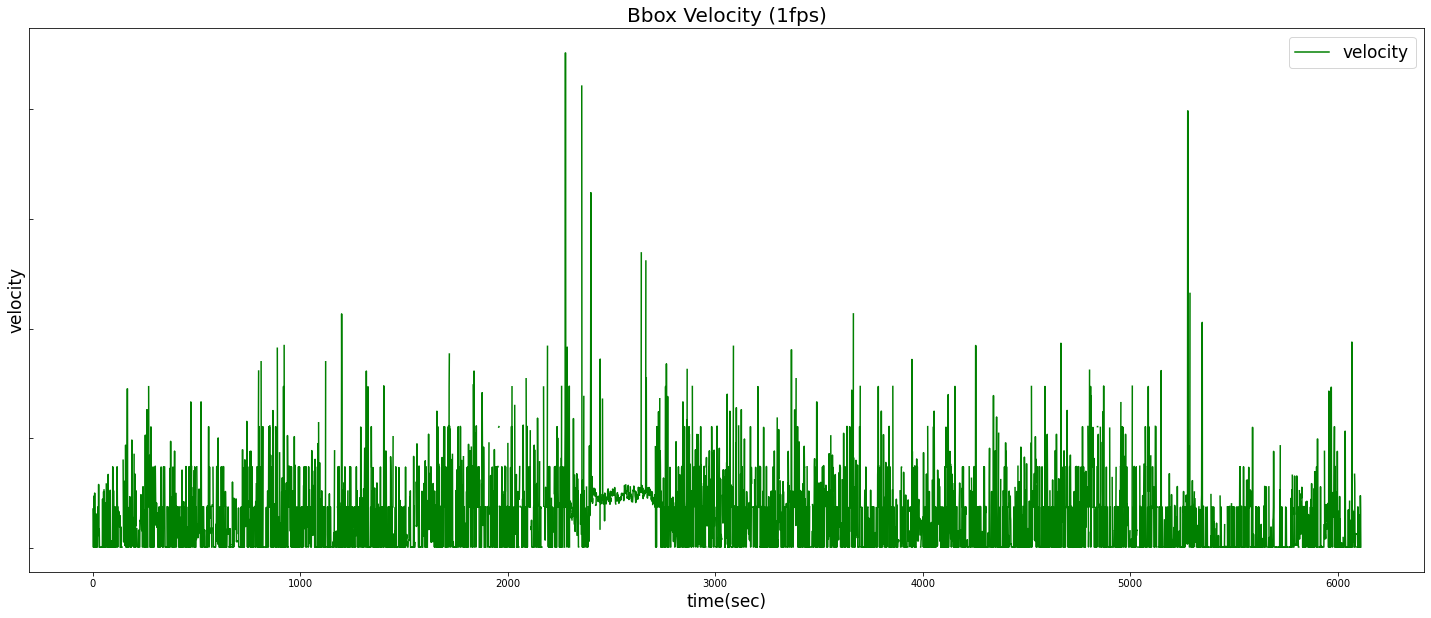

In [24]:
x_value = range(len(v_list))
y_value = v_list

fig = plt.figure(figsize=(25,10))

fig.patch.set_facecolor('xkcd:white')
# plt.style.use('default')

plt.plot(x_value, y_value, 'g-', label = 'velocity')
plt.legend(prop={'size':17})
plt.title("Bbox Velocity (1fps)", fontdict={'fontsize': 20})

plt.xlabel('time(sec)', fontdict={'fontsize': 17})
plt.ylabel('velocity', fontdict={'fontsize': 17})

plt.tick_params(axis='y', direction = 'in', labelleft = False)

plt.show()

#### frame 묶어서 단순화하기
    - 1분 단위로 채팅방 속도 변화를 탐색해보자. (아래 n 값에 60을 넣는다.)
        - nan 값을 처리하지 않아, 아래 묶은 그래프는 그리지 못함. -> 먼저, nan값을 전처리 할 필요가 있음.

In [29]:
n = 60 # n개의 묶음으로 평균 꺽은선 그래프를 그려보자 

result_mean = [np.mean(v_list[i * n:(i + 1) * n]) for i in range((len(v_list) + n - 1) // n )]

In [ ]:
x_value = range(len(result_mean))
y_value = result_mean

fig = plt.figure(figsize=(25,10))

fig.patch.set_facecolor('xkcd:white')
plt.style.use('default')

plt.plot(x_value, y_value, 'g-', linewidth = 3, label = 'velocity')
plt.legend(loc = 'best', prop={'size':17})
plt.title("Bbox Velocity per 1min (1fps)", fontdict={'fontsize': 20})

plt.xlabel('time(min)', fontdict={'fontsize': 17})
plt.ylabel('velocity', fontdict={'fontsize': 17})

plt.xticks(range(0,100+1,10), fontsize = 10)
plt.tick_params(axis = 'y', direction = 'in', labelleft = False, grid_color='r')

plt.show()

# Appendix
    - np.arange vs range
    - subplot

In [150]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [152]:
list(range(5))

[0, 1, 2, 3, 4]

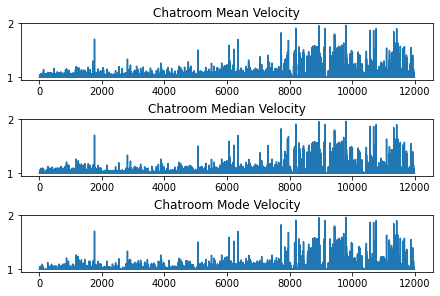

In [169]:
# figure.add_subplots()

video = 'Drive'
title_list = ['Mean', 'Median', 'Mode']

fig = plt.figure(constrained_layout=True)
# fig.tight_layout()

for (idx, y), title in zip(enumerate(video_highlight_dic[video]), title_list):
    
    x = np.arange(len(y))
    
    ax = fig.add_subplot(3,1,idx+1)
    ax.plot(x, y)
    ax.set_title(f'Chatroom {title} Velocity')

plt.show()

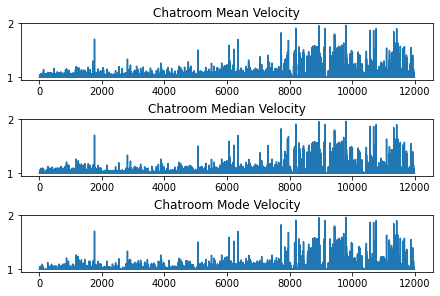

In [164]:
# plt.subplots()

video = 'Drive'
title_list = ['Mean', 'Median', 'Mode']

fig, axs = plt.subplots(3,1, constrained_layout=True)

for (idx, y), title in zip(enumerate(video_highlight_dic[video]), title_list):
    
    x = np.arange(len(y))

    axs[idx].plot(x,y)
    axs[idx].set_title(f'Chatroom {title} Velocity')

plt.show()

## Record
    - thres: 0.3/ 0.5/ 0.7
    - Method: mean, median, mode

In [ ]:
## thres 0.3

# _Drive highlight Result________

# ______evaluation_____
# recall_0.3 : 0.48
# precision_0.3 : 0.06
# F1-score_0.3 : 0.11

# ______evaluation_____
# recall_0.3 : 0.48
# precision_0.3 : 0.07
# F1-score_0.3 : 0.12

# ______evaluation_____
# recall_0.3 : 0.29
# precision_0.3 : 0.06
# F1-score_0.3 : 0.09
# #######################
# Dentist highlight Result________

# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.02
# F1-score_0.3 : 0.04

# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.02
# F1-score_0.3 : 0.04

# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.03
# F1-score_0.3 : 0.05
# #########################
# Fortune highlight Result________

# ______evaluation_____
# recall_0.3 : 0.11
# precision_0.3 : 0.04
# F1-score_0.3 : 0.06

# recall_03 = [ 0.48 0.48 0.29 0.5  0.5 0.5 0.11 0.11 0.04  0.88 0.88 0.44  0.8  0.76 0.63]
# precision_03 = [0.06 0.07 0.06 0.02 0.02 0.03 0.04  0.04 0.02 0.13 0.14 0.11  0.07 0.07 0.07]
# F1_score_03 = [0.11 0.12 0.09  0.04 0.04 0.05 0.06 0.03 0.23 0.25 0.18 0.13 0.13 0.13]
    
# ______evaluation_____
# recall_0.3 : 0.11
# precision_0.3 : 0.04
# F1-score_0.3 : 0.06

# ______evaluation_____
# recall_0.3 : 0.04
# precision_0.3 : 0.02
# F1-score_0.3 : 0.03
# #########################
# Kart highlight Result________

# ______evaluation_____
# recall_0.3 : 0.88
# precision_0.3 : 0.13
# F1-score_0.3 : 0.23

# ______evaluation_____
# recall_0.3 : 0.88
# precision_0.3 : 0.14
# F1-score_0.3 : 0.25

# ______evaluation_____
# recall_0.3 : 0.44
# precision_0.3 : 0.11
# F1-score_0.3 : 0.18
# #############################
# _________Fact highlight Result________

# ______evaluation_____
# recall_0.3 : 0.8
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13

# ______evaluation_____
# recall_0.3 : 0.76
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13

# ______evaluation_____
# recall_0.3 : 0.63
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13

In [ ]:
# thres0.5

______evaluation_____
recall_0.5 : 0.14
precision_0.5 : 0.06
F1-score_0.5 : 0.09
______evaluation_____
recall_0.5 : 0.19
precision_0.5 : 0.06
F1-score_0.5 : 0.1
______evaluation_____
recall_0.5 : 0.1
precision_0.5 : 0.04
F1-score_0.5 : 0.05
#####################
________Dentist highlight Result________
______evaluation_____
recall_0.5 : 0.36
precision_0.5 : 0.04
F1-score_0.5 : 0.07
______evaluation_____
recall_0.5 : 0.36
precision_0.5 : 0.04
F1-score_0.5 : 0.07
______evaluation_____
recall_0.5 : 0.32
precision_0.5 : 0.04
F1-score_0.5 : 0.07
###################
Fortune highlight Result________
______evaluation_____
recall_0.5 : 0.04
precision_0.5 : 0.04
F1-score_0.5 : 0.04
    

______evaluation_____
recall_0.5 : 0.04
precision_0.5 : 0.04
F1-score_0.5 : 0.04
______evaluation_____
recall_0.5 : 0.0
precision_0.5 : 0.0
F1-score_0.5 : nan
####################
Kart highlight Result________
______evaluation_____
recall_0.5 : 0.16
precision_0.5 : 0.09
F1-score_0.5 : 0.12
______evaluation_____
recall_0.5 : 0.16
precision_0.5 : 0.09
F1-score_0.5 : 0.11
______evaluation_____
recall_0.5 : 0.12
precision_0.5 : 0.08
F1-score_0.5 : 0.1
####################
________Fact highlight Result________
______evaluation_____
recall_0.5 : 0.15
precision_0.5 : 0.05
F1-score_0.5 : 0.08
______evaluation_____
recall_0.5 : 0.2
precision_0.5 : 0.06
F1-score_0.5 : 0.1
______evaluation_____
recall_0.5 : 0.15
precision_0.5 : 0.06
F1-score_0.5 : 0.08

In [ ]:
________Drive highlight Result________
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05
###########################
________Dentist highlight Result________
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.11
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.1
______evaluation_____
recall_0.7 : 0.23
precision_0.7 : 0.07
F1-score_0.7 : 0.1
######################
________Fortune highlight Result________
______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan
______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan
______evaluation_____
recall_0.7 : 0.0
precision_0.7 : 0.0
F1-score_0.7 : nan
#########################
________Kart highlight Result________
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.1
F1-score_0.7 : 0.08
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.09
F1-score_0.7 : 0.07
______evaluation_____
recall_0.7 : 0.06
precision_0.7 : 0.11
F1-score_0.7 : 0.08
##########################
________Fact highlight Result________
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.05
F1-score_0.7 : 0.05
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.05
F1-score_0.7 : 0.05
______evaluation_____
recall_0.7 : 0.05
precision_0.7 : 0.06
F1-score_0.7 : 0.05

In [ ]:
###### Mean ########
# ##Drive
# ______evaluation_____
# recall_0.3 : 0.48
# precision_0.3 : 0.06
# F1-score_0.3 : 0.11
# ______evaluation_____
# recall_0.5 : 0.14
# precision_0.5 : 0.06
# F1-score_0.5 : 0.09
# ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.06
# F1-score_0.7 : 0.05
# ##Dentist
# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.02
# F1-score_0.3 : 0.04
# ______evaluation_____
# recall_0.5 : 0.36
# precision_0.5 : 0.04
# F1-score_0.5 : 0.07
# ______evaluation_____
# recall_0.7 : 0.23
# precision_0.7 : 0.07
# F1-score_0.7 : 0.11
# ##Fortune
# ______evaluation_____
# recall_0.3 : 0.11
# precision_0.3 : 0.04
# F1-score_0.3 : 0.06
# ______evaluation_____
# recall_0.5 : 0.04
# precision_0.5 : 0.04
# F1-score_0.5 : 0.04
# ______evaluation_____
# recall_0.7 : 0.0
# precision_0.7 : 0.0
# F1-score_0.7 : nan
# ##Kart
# ______evaluation_____
# recall_0.3 : 0.88
# precision_0.3 : 0.13
# F1-score_0.3 : 0.23
# ______evaluation_____
# recall_0.5 : 0.16
# precision_0.5 : 0.09
# F1-score_0.5 : 0.12
# ______evaluation_____
# recall_0.7 : 0.06
# precision_0.7 : 0.1
# F1-score_0.7 : 0.08
# ##Fact
# ______evaluation_____
# recall_0.3 : 0.8
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13
# ______evaluation_____
# recall_0.5 : 0.15
# precision_0.5 : 0.05
# F1-score_0.5 : 0.08
# ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.05
# F1-score_0.7 : 0.05

In [ ]:
# ######Median#######
# ## Drive
# ______evaluation_____
# recall_0.3 : 0.48
# precision_0.3 : 0.07
# F1-score_0.3 : 0.12
# ______evaluation_____
# recall_0.5 : 0.19
# precision_0.5 : 0.06
# F1-score_0.5 : 0.1
#     ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.06
# F1-score_0.7 : 0.05
# ## Dentist
# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.02
# F1-score_0.3 : 0.04
#     ______evaluation_____
# recall_0.5 : 0.36
# precision_0.5 : 0.04
# F1-score_0.5 : 0.07
#     ______evaluation_____
# recall_0.7 : 0.23
# precision_0.7 : 0.07
# F1-score_0.7 : 0.1
    
# ## Fortune
# ______evaluation_____
# recall_0.3 : 0.11
# precision_0.3 : 0.04
# F1-score_0.3 : 0.06
#     ______evaluation_____
# recall_0.5 : 0.04
# precision_0.5 : 0.04
# F1-score_0.5 : 0.04
#     ______evaluation_____
# recall_0.7 : 0.0
# precision_0.7 : 0.0
# F1-score_0.7 : nan
# ## Kart
# ______evaluation_____
# recall_0.3 : 0.88
# precision_0.3 : 0.14
# F1-score_0.3 : 0.25
#     ______evaluation_____
# recall_0.5 : 0.16
# precision_0.5 : 0.09
# F1-score_0.5 : 0.11
#     ______evaluation_____
# recall_0.7 : 0.06
# precision_0.7 : 0.09
# F1-score_0.7 : 0.07
# ## Fact
# ______evaluation_____
# recall_0.3 : 0.76
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13
#     ______evaluation_____
# recall_0.5 : 0.2
# precision_0.5 : 0.06
# F1-score_0.5 : 0.1
#     ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.05
# F1-score_0.7 : 0.05

In [ ]:
# ######Mode#######
# ## Drive
# ______evaluation_____
# recall_0.3 : 0.29
# precision_0.3 : 0.06
# F1-score_0.3 : 0.09
#     ______evaluation_____
# recall_0.5 : 0.1
# precision_0.5 : 0.04
# F1-score_0.5 : 0.05
#     ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.06
# F1-score_0.7 : 0.05
# ## Dentist
# ______evaluation_____
# recall_0.3 : 0.5
# precision_0.3 : 0.03
# F1-score_0.3 : 0.05
#     ______evaluation_____
# recall_0.5 : 0.32
# precision_0.5 : 0.04
# F1-score_0.5 : 0.07
#     ______evaluation_____
# recall_0.7 : 0.23
# precision_0.7 : 0.07
# F1-score_0.7 : 0.1
# ## Fortune
# ______evaluation_____
# recall_0.3 : 0.04
# precision_0.3 : 0.02
# F1-score_0.3 : 0.03
#     ______evaluation_____
# recall_0.5 : 0.0
# precision_0.5 : 0.0
# F1-score_0.5 : nan
#     ______evaluation_____
# recall_0.7 : 0.0
# precision_0.7 : 0.0
# F1-score_0.7 : nan
# ## Kart
# ______evaluation_____
# recall_0.3 : 0.44
# precision_0.3 : 0.11
# F1-score_0.3 : 0.18
#     ______evaluation_____
# recall_0.5 : 0.12
# precision_0.5 : 0.08
# F1-score_0.5 : 0.1
#     ______evaluation_____
# recall_0.7 : 0.06
# precision_0.7 : 0.11
# F1-score_0.7 : 0.08
# ## Fact
# ______evaluation_____
# recall_0.3 : 0.63
# precision_0.3 : 0.07
# F1-score_0.3 : 0.13
#     ______evaluation_____
# recall_0.5 : 0.15
# precision_0.5 : 0.06
# F1-score_0.5 : 0.08
#     ______evaluation_____
# recall_0.7 : 0.05
# precision_0.7 : 0.06
# F1-score_0.7 : 0.05

# Try&Error

In [41]:
hwty_list = [] # 8개의 Bounding Box (x,y)값 ==> (height, width, time(1fps), left_upper_y)
time = 0
for txt in md_txt:
    time += 1
    hwty_list_s = []
    for b in txt:
        hwty = height_width_conversion(b)
        hwty.append(time)
        hwty.append(int(b[1]))
        hwty_list_s.append(hwty)
    hwty_list.append(hwty_list_s)

hwty_list #각 채팅 box에 대해 [높이, 너비, 시간(1fps), 좌측 상단 y값]

[[[34, 120, 1, 6],
  [126, 96, 1, 156],
  [40, 98, 1, 175],
  [42, 98, 1, 218],
  [22, 142, 1, 256],
  [22, 82, 1, 256],
  [42, 134, 1, 261],
  [22, 40, 1, 280],
  [22, 114, 1, 279],
  [20, 40, 1, 282],
  [22, 110, 1, 322],
  [30, 34, 1, 688],
  [34, 94, 1, 685],
  [32, 92, 1, 688],
  [32, 152, 1, 688],
  [30, 60, 1, 688],
  [30, 60, 1, 688],
  [32, 134, 1, 688]]]

In [12]:
# normalization
h_list = []
for frame in hwty_list:
    for bbox in frame:
        h_list.append(bbox[0])

#전체 영상에 대해 채팅창이 움직이지 않았다는 가정 하에, 채팅창 총 높이 = max_distance
maximum_distance = max(h_list) - min(h_list)

In [20]:
max_d = maximum_distance #채팅방 전체 높이로 나누어 Normalization 할 것. 

v_list = []
for fr_num in range(len(hwty_list)-1):
    v_list_s=[] #프레임 당 초기화
    for fb_box, f_box, fa_box in zip(hwty_list[fr_num][:-2], hwty_list[fr_num][1:-1], hwty_list[fr_num][2:]): # 이전, 지금, 이후 box
        for sb_box, s_box, sa_box in zip(hwty_list[fr_num+1][:-2], hwty_list[fr_num+1][1:-1], hwty_list[fr_num+1][2:]):
            if (f_box[1] == s_box[1]) & ( (fb_box[1] == sb_box[1]) | (fa_box[1] == sa_box[1]) ): #지금 width가 같으면서, 이전과 이후 중 1개만 같으면+ 같으면 통과 
                distance = np.abs(s_box[3] - f_box[3]) +1 #1은 margin distance가 0이 되는 경우
                velocity = distance / (s_box[2] - f_box[2]) 
                normalized_v = velocity / max_d
                v_list_s.append(normalized_v)
            else:
                pass #탐색하지 못하는 경우
#                 v_list_s.append(1/max_d) #같은 박스를 찾지 못한 경우, 최솟값 1/max_d값을 넣는 경우를 고려한다.
    v_list.append(np.mean(v_list_s)) #1 프레임의 모든 box에 대해 평균